# Analiza meritev nosilca #
## Priprave ##

In [4]:
# uvoz potrebnih knjižnic
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import AutoMinorLocator
from matplotlib import cm
import lvm_read
import pyFBS
import pyEMA
from tqdm import tqdm
import cmath

# nastavitev grafov
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 80 # 200 e.g. is really fine, but slower
plt.rcParams.update({'text.usetex': True,
                     'font.size': 15,
                     'font.family':'lmodern',})

In [5]:
# Razred za prebavo podatkov
class Meritev():
    ''' Input je .lvm datoteka meritve. '''
    def __init__(self, read_data):
        self.data = lvm_read.read(read_data)

    def time(self):
        # preberemo nastavitve meritve
        '''Vrne dt[0], fs[1] in čas[2] od Class Meritev.'''
        N = self.data[0]['Samples'][2]  # število vzorcev
        dt = self.data[0]['Delta_X'][2] # časovni razmak med dvema zaporednima vzorcema
        t = np.arange(start=0,stop=N*dt,step=dt)  # ustvarimo časovno os
        return N, dt, t
    
    def instruments(self):
        '''
        Vrne meritve inštrumentov:
        0 - Sila
        1 - Pospešek
        2 - LabViewFRF (Magnituda)
        3 - LabViewFRF (Faza)
        '''
        # pospeškomer
        acceleration = self.data[0]['data'][:,2]
        # sila udarnega klasiva
        force = self.data[0]['data'][:,3]
        # Magnituda FRF-ja
        magnitude = self.data[0]['data'][:,0]
        # Faza FRF-ja
        phase = self.data[0]['data'][:,1]
        
        return force, acceleration, magnitude, phase

In [6]:
# preberemo meritve (vsaka datoteka ima eno meritev)
meritevT0 = [Meritev('./Meritve/T0/udarec_T_0.lvm'),
             Meritev('./Meritve/T0/udarec_T_1.lvm'),
             Meritev('./Meritve/T0/udarec_T_2.lvm'),
             Meritev('./Meritve/T0/udarec_T_3.lvm'),
             Meritev('./Meritve/T0/udarec_T_4.lvm')]
meritevT1 = [Meritev('./Meritve/T1/udarec_T_0.lvm'),
             Meritev('./Meritve/T1/udarec_T_1.lvm'),
             Meritev('./Meritve/T1/udarec_T_2.lvm'),
             Meritev('./Meritve/T1/udarec_T_3.lvm'),
             Meritev('./Meritve/T1/udarec_T_4.lvm')]
meritevT2 = [Meritev('./Meritve/T2/udarec_T_0.lvm'),
             Meritev('./Meritve/T2/udarec_T_1.lvm'),
             Meritev('./Meritve/T2/udarec_T_2.lvm'),
             Meritev('./Meritve/T2/udarec_T_3.lvm'),
             Meritev('./Meritve/T2/udarec_T_4.lvm')]
meritevT3 = [Meritev('./Meritve/T3/udarec_T_0.lvm'),
             Meritev('./Meritve/T3/udarec_T_1.lvm'),
             Meritev('./Meritve/T3/udarec_T_2.lvm'),
             Meritev('./Meritve/T3/udarec_T_3.lvm'),
             Meritev('./Meritve/T3/udarec_T_4.lvm')]
meritevT4 = [Meritev('./Meritve/T4/udarec_T_0.lvm'),
             Meritev('./Meritve/T4/udarec_T_1.lvm'),
             Meritev('./Meritve/T4/udarec_T_2.lvm'),
             Meritev('./Meritve/T4/udarec_T_3.lvm'),
             Meritev('./Meritve/T4/udarec_T_4.lvm')]
meritevT5 = [Meritev('./Meritve/T5/udarec_T_0.lvm'),
             Meritev('./Meritve/T5/udarec_T_1.lvm'),
             Meritev('./Meritve/T5/udarec_T_2.lvm'),
             Meritev('./Meritve/T5/udarec_T_3.lvm'),
             Meritev('./Meritve/T5/udarec_T_4.lvm')]
meritevT6 = [Meritev('./Meritve/T6/udarec_T_0.lvm'),
             Meritev('./Meritve/T6/udarec_T_1.lvm'),
             Meritev('./Meritve/T6/udarec_T_2.lvm'),
             Meritev('./Meritve/T6/udarec_T_3.lvm'),
             Meritev('./Meritve/T6/udarec_T_4.lvm')]
meritevT7 = [Meritev('./Meritve/T7/udarec_T_0.lvm'),
             Meritev('./Meritve/T7/udarec_T_1.lvm'),
             Meritev('./Meritve/T7/udarec_T_2.lvm'),
             Meritev('./Meritve/T7/udarec_T_3.lvm'),
             Meritev('./Meritve/T7/udarec_T_4.lvm')]
meritevT8 = [Meritev('./Meritve/T8/udarec_T_0.lvm'),
             Meritev('./Meritve/T8/udarec_T_1.lvm'),
             Meritev('./Meritve/T8/udarec_T_2.lvm'),
             Meritev('./Meritve/T8/udarec_T_3.lvm'),
             Meritev('./Meritve/T8/udarec_T_4.lvm')]
meritevT9 = [Meritev('./Meritve/T9/udarec_T_0.lvm'),
             Meritev('./Meritve/T9/udarec_T_1.lvm'),
             Meritev('./Meritve/T9/udarec_T_2.lvm'),
             Meritev('./Meritve/T9/udarec_T_3.lvm'),
             Meritev('./Meritve/T9/udarec_T_4.lvm')]
meritevT10 = [Meritev('./Meritve/T10/udarec_T_0.lvm'),
             Meritev('./Meritve/T10/udarec_T_1.lvm'),
             Meritev('./Meritve/T10/udarec_T_2.lvm'),
             Meritev('./Meritve/T10/udarec_T_3.lvm'),
             Meritev('./Meritve/T10/udarec_T_4.lvm')]
meritevT11 = [Meritev('./Meritve/T11/udarec_T_0.lvm'),
             Meritev('./Meritve/T11/udarec_T_1.lvm'),
             Meritev('./Meritve/T11/udarec_T_2.lvm'),
             Meritev('./Meritve/T11/udarec_T_3.lvm'),
             Meritev('./Meritve/T11/udarec_T_4.lvm')]
meritevT12 = [Meritev('./Meritve/T12/udarec_T_0.lvm'),
             Meritev('./Meritve/T12/udarec_T_1.lvm'),
             Meritev('./Meritve/T12/udarec_T_2.lvm'),
             Meritev('./Meritve/T12/udarec_T_3.lvm'),
             Meritev('./Meritve/T12/udarec_T_4.lvm')]
meritevT13 = [Meritev('./Meritve/T13/udarec_T_0.lvm'),
             Meritev('./Meritve/T13/udarec_T_1.lvm'),
             Meritev('./Meritve/T13/udarec_T_2.lvm'),
             Meritev('./Meritve/T13/udarec_T_3.lvm'),
             Meritev('./Meritve/T13/udarec_T_4.lvm')]
meritevT14 = [Meritev('./Meritve/T14/udarec_T_0.lvm'),
             Meritev('./Meritve/T14/udarec_T_1.lvm'),
             Meritev('./Meritve/T14/udarec_T_2.lvm'),
             Meritev('./Meritve/T14/udarec_T_3.lvm'),
             Meritev('./Meritve/T14/udarec_T_4.lvm')]
meritevT15 = [Meritev('./Meritve/T15/udarec_T_0.lvm'),
             Meritev('./Meritve/T15/udarec_T_1.lvm'),
             Meritev('./Meritve/T15/udarec_T_2.lvm'),
             Meritev('./Meritve/T15/udarec_T_3.lvm'),
             Meritev('./Meritve/T15/udarec_T_4.lvm')]
meritevT16 = [Meritev('./Meritve/T16/udarec_T_0.lvm'),
             Meritev('./Meritve/T16/udarec_T_1.lvm'),
             Meritev('./Meritve/T16/udarec_T_2.lvm'),
             Meritev('./Meritve/T16/udarec_T_3.lvm'),
             Meritev('./Meritve/T16/udarec_T_4.lvm')]
meritevT17 = [Meritev('./Meritve/T17/udarec_T_0.lvm'),
             Meritev('./Meritve/T17/udarec_T_1.lvm'),
             Meritev('./Meritve/T17/udarec_T_2.lvm'),
             Meritev('./Meritve/T17/udarec_T_3.lvm'),
             Meritev('./Meritve/T17/udarec_T_4.lvm')]
meritevT18 = [Meritev('./Meritve/T18/udarec_T_0.lvm'),
             Meritev('./Meritve/T18/udarec_T_1.lvm'),
             Meritev('./Meritve/T18/udarec_T_2.lvm'),
             Meritev('./Meritve/T18/udarec_T_3.lvm'),
             Meritev('./Meritve/T18/udarec_T_4.lvm')]
meritevT19 = [Meritev('./Meritve/T19/udarec_T_0.lvm'),
             Meritev('./Meritve/T19/udarec_T_1.lvm'),
             Meritev('./Meritve/T19/udarec_T_2.lvm'),
             Meritev('./Meritve/T19/udarec_T_3.lvm'),
             Meritev('./Meritve/T19/udarec_T_4.lvm')]
meritevT20 = [Meritev('./Meritve/T20/udarec_T_0.lvm'),
             Meritev('./Meritve/T20/udarec_T_1.lvm'),
             Meritev('./Meritve/T20/udarec_T_2.lvm'),
             Meritev('./Meritve/T20/udarec_T_3.lvm'),
             Meritev('./Meritve/T20/udarec_T_4.lvm')]
meritevT21 = [Meritev('./Meritve/T21/udarec_T_0.lvm'),
             Meritev('./Meritve/T21/udarec_T_1.lvm'),
             Meritev('./Meritve/T21/udarec_T_2.lvm'),
             Meritev('./Meritve/T21/udarec_T_3.lvm'),
             Meritev('./Meritve/T21/udarec_T_4.lvm')]
meritevT22 = [Meritev('./Meritve/T22/udarec_T_0.lvm'),
             Meritev('./Meritve/T22/udarec_T_1.lvm'),
             Meritev('./Meritve/T22/udarec_T_2.lvm'),
             Meritev('./Meritve/T22/udarec_T_3.lvm'),
             Meritev('./Meritve/T22/udarec_T_4.lvm')]
meritevT23 = [Meritev('./Meritve/T23/udarec_T_0.lvm'),
             Meritev('./Meritve/T23/udarec_T_1.lvm'),
             Meritev('./Meritve/T23/udarec_T_2.lvm'),
             Meritev('./Meritve/T23/udarec_T_3.lvm'),
             Meritev('./Meritve/T23/udarec_T_4.lvm')]
meritevT24 = [Meritev('./Meritve/T24/udarec_T_0.lvm'),
             Meritev('./Meritve/T24/udarec_T_1.lvm'),
             Meritev('./Meritve/T24/udarec_T_2.lvm'),
             Meritev('./Meritve/T24/udarec_T_3.lvm'),
             Meritev('./Meritve/T24/udarec_T_4.lvm')]
meritevT25 = [Meritev('./Meritve/T25/udarec_T_0.lvm'),
             Meritev('./Meritve/T25/udarec_T_1.lvm'),
             Meritev('./Meritve/T25/udarec_T_2.lvm'),
             Meritev('./Meritve/T25/udarec_T_3.lvm'),
             Meritev('./Meritve/T25/udarec_T_4.lvm')]
meritevT26 = [Meritev('./Meritve/T26/udarec_T_0.lvm'),
             Meritev('./Meritve/T26/udarec_T_1.lvm'),
             Meritev('./Meritve/T26/udarec_T_2.lvm'),
             Meritev('./Meritve/T26/udarec_T_3.lvm'),
             Meritev('./Meritve/T26/udarec_T_4.lvm')]

# seznam vseh meritev
meritve = [meritevT0, meritevT1, meritevT2, meritevT3, meritevT4, meritevT5, meritevT6, meritevT7, meritevT8, meritevT9, 
           meritevT10, meritevT11, meritevT12, meritevT13, meritevT14, meritevT15, meritevT16, meritevT17, meritevT18, meritevT19,
           meritevT20, meritevT21, meritevT22, meritevT23, meritevT24, meritevT25, meritevT26]

## Frekvenčna prenosna funkcija in cenilke##

### Pregled impulzne sile ###

In [7]:
# Obravnavamo točko p
p = 10

In [8]:
# preberemo nastavitve meritve
# beremo zgolj za prvo ponovitev, ker so vse ostale enake
N = meritevT0[0].time()[0] # število vzorcev
dt = meritevT0[0].time()[1] # časovni razmak med dvema zaporednima vzorcema
t = meritevT0[0].time()[2] # ustvarimo časovno os

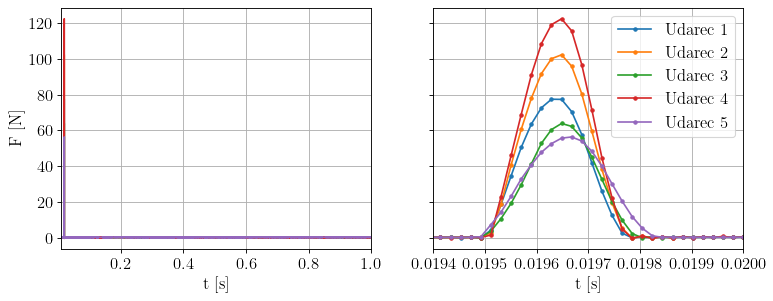

In [32]:
# pogledamo udarec u v merilni točki p in preverimo, da ni prisotnih dvojnih udarcev
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(11, 4)
for u in range(len(meritve[p])):
    ax1.plot(t, meritve[p][u].instruments()[0])
    ax1.grid(True, linestyle = '-', which='major');
    ax1.set_xlim(0.01,1.0);
    ax1.set_xlabel(r't [s]');
    ax1.set_ylabel(r'F [N]');
    
    ax2.plot(t, meritve[p][u].instruments()[0], '.-', label='Udarec %d'%(u+1))
    ax2.grid(True, linestyle = '-', which='major');
    ax2.set_xlim(0.0194,0.0200);
    ax2.set_xlabel(r't [s]');
    
    #ax3.plot(t, meritve[p][u].instruments()[0], '.-', label='Udarec %d'%(u+1))
    #ax3.grid(True, linestyle = '-', which='major');
    #ax3.set_xlim(0.0194,0.0200);
    #ax3.set_xlabel(r't [s]');
    ax2.legend(loc=0);
    
#plt.savefig("slike/Udarec.pdf",bbox_inches = "tight")
plt.show();

### Vpliv okna na silo ###

In [13]:
# force okno
def force_window(f):
    """
    :param f: Časovni signal sile.
    :type N: arary
    :return: Force okno, oknjen časovni signal sile.
    
    """
    
    i_max = np.argmax(f)
    i_low = np.copy(i_max)
    while f[i_low] >= f[i_low-1]:
        i_low -= 1
    i_high = np.copy(i_max)
    while f[i_high] >= 1:
        i_high += 1
  
    w_f = np.zeros_like(f)
    w_f[i_low:i_high] = 1. 
    
    return w_f, w_f*f

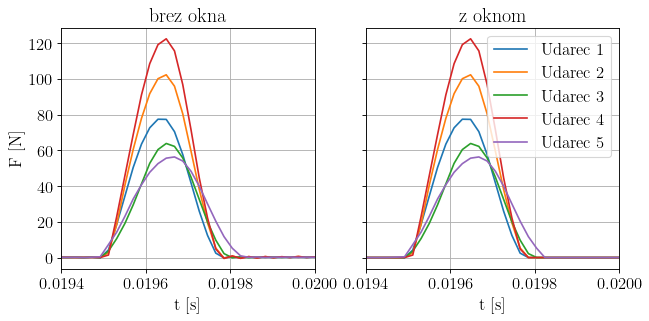

In [35]:
# pogledamo vsa vzbujanja z dodanim oknom
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(9, 4)
for u in range(len(meritve[p])):
    ax1.plot(t, meritve[p][u].instruments()[0])
    ax1.set_xlabel(r't [s]');
    ax1.set_title("brez okna");
    ax1.grid(True, linestyle = '-', which='major');
    ax1.set_xlim(0.0194,0.0200);

    ax2.plot(t, force_window(meritve[p][u].instruments()[0])[1], label='Udarec %d'%(u+1))
    ax2.set_xlabel(r't [s]');
    ax2.set_title("z oknom");
    ax2.grid(True, linestyle = '-', which='major');
    ax2.set_xlim(0.0194,0.0200);
    ax2.legend(loc=0);

ax1.set_ylabel(r'F [N]');
#plt.savefig("slike/okno_sila.pdf",bbox_inches = "tight")

### Frekvenčna domena za silo ###

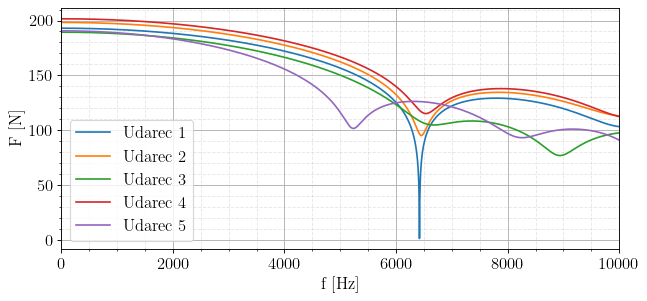

In [36]:
# slika vzbujevalne sile v frekvenčni domeni
plt.figure(figsize=(9,4))
for u in range(len(meritve[p])):
    Fi = np.fft.rfft(force_window(meritve[p][u].instruments()[0][0:N])[1])/N*2
    Fi_dB = 20*np.log(Fi/1e-6)
    freq = np.fft.rfftfreq(N, d=dt)
    plt.plot(freq, np.real(Fi_dB), label='Udarec %d'%(u+1))
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True, linestyle = '-', which='major');
plt.grid(True, linestyle = '--', which='minor', alpha=0.3);
plt.xlim(0,10000);    
plt.xlabel(r'f [Hz]');
plt.ylabel(r'F [N]');
plt.legend(loc=0);
#plt.savefig("slike/Udarec_frekvenca.pdf",bbox_inches = "tight")

### Eksponentno okno za pospešek ###

In [37]:
# eksponentno okno

def exponential_window(x, exp_window=1e-3):
    """
    :param x: Časovni signal odziva.
    :type x: array
    :param exp_window: Vrednost na koncu signala.
    :type exp_window: float
    
    :return: Eksponentno okno. oknjen časovni signal odziva.
    """
    N = len(x)
    w_x = np.arange(N)
    w_x = np.exp(np.log(exp_window)*w_x / (N - 1))
    return w_x, w_x*x

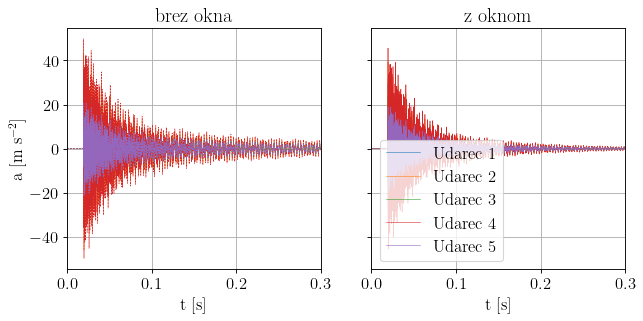

In [38]:
# primerjava odziva brez in z oknom za meritev u v točki p
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(9, 4)
for u in range(len(meritve[p])):
    ax1.plot(t, meritve[p][u].instruments()[1], linestyle = '--', linewidth = 0.5) # TO NI OK, SIGNAL MORA PASTI NA 0!!! (artefakti v frekvenčni sliki zaradi nezveznih skokov)
    ax1.set_xlabel(r't [s]');
    ax1.set_title("brez okna");
    ax1.grid(True, linestyle = '-', which='major');
    ax1.set_xlim(0,0.3);
    ax1.set_ylabel(r'a [m s$^{-2}$]');

    ax2.plot(t, exponential_window(meritve[p][u].instruments()[1])[1], linewidth = 0.5, label='Udarec %d'%(u+1)) # TO NI OK, SINTETIČNO DODAMO DUŠENJE!
    ax2.set_xlabel(r't [s]');
    ax2.set_title("z oknom");
    ax2.grid(True, linestyle = '-', which='major');
    ax2.set_xlim(0,0.3);
    ax2.legend(loc=0);
    
#plt.savefig("slike/okno_pospesek.pdf",bbox_inches = "tight")

### FRF primerjamo z LabView FRF-jem ###

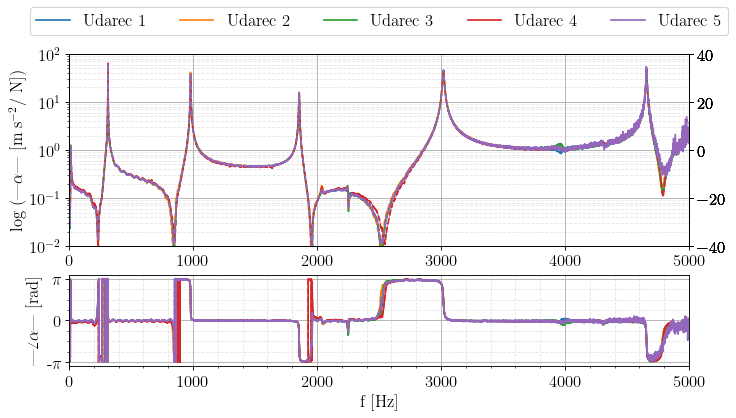

In [46]:
# izračun frekvenčne prenosne funkcije v točki p

fig, (ax1, ax3) = plt.subplots(2, 1)
fig.set_size_inches(10, 7)
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", 
          "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

for u in range(len(meritve[p])):
    freq = np.fft.rfftfreq(N, d=dt)
    Hi = np.fft.rfft(meritve[p][u].instruments()[1])/np.fft.rfft(meritve[p][u].instruments()[0])
    
    ax1.semilogy(freq, np.abs(Hi), '-', color=colors[u], linewidth=0.5)
    ax1.set_ylabel(r' log (|$\alpha$| [m s$^{-2}$/ N])')
    ax1.grid(True, linestyle = '-', which='major');
    ax1.grid(True, linestyle = '--', which='minor', alpha=0.3);
    ax1.set_ylim(0.01,100);
    
    ax2 = ax1.twinx()
    ax2.plot(
        np.linspace(0, 2*freq[-1], num=len(meritve[p][u].instruments()[2])), 
        meritve[p][u].instruments()[2], '--', color=colors[u]
    )
    
    ax2.set_xlim(0,5000);
    ax2.set_ylim(-40,40);

    plt.subplot(413)
    plt.plot(freq, np.angle(Hi), '-', label='Udarec %d'%(u+1), color=colors[u])
    plt.plot(
        np.linspace(0, 2*freq[-1], num=len(meritve[p][u].instruments()[2])), 
        meritve[p][u].instruments()[3], '--', color=colors[u]
    )
    plt.xlim(0,5000);
    plt.ylabel(r'|$\angle \alpha$| [rad]')
    plt.yticks((-np.pi,0,np.pi), (r'-$\pi$', r'0', r'$\pi$'));
    plt.xlabel('f [Hz]')
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, linestyle = '-', which='major');
    plt.grid(True, linestyle = '--', which='minor', alpha=0.3);
        
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 4));

#plt.savefig("slike/FRF_nedusen.pdf",bbox_inches = "tight")

### FRF z oknom ###

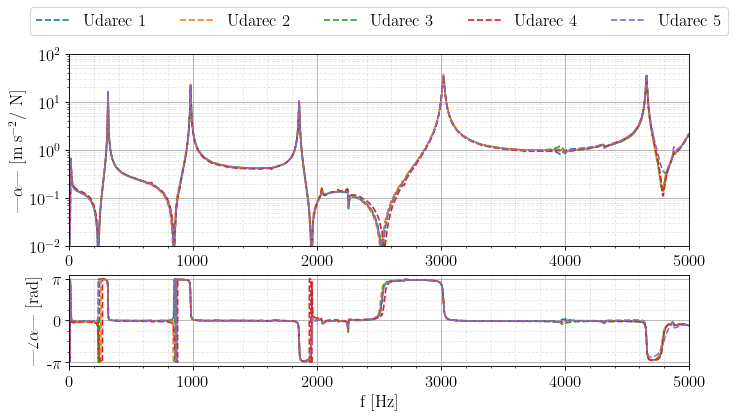

In [47]:
# vpliv eksponentnega okna
plt.figure(figsize=(10,7))
for u in range(len(meritve[p])):
    freq = np.fft.rfftfreq(N, d=dt)
    Hi = np.fft.rfft(exponential_window(meritve[p][u].instruments()[1])[1])/np.fft.rfft(force_window(meritve[p][u].instruments()[0])[1])

    plt.subplot(211)
    plt.semilogy(freq, np.abs(Hi), '--')
    plt.xlim(0,5000);
    plt.ylim(0.01,100);
    plt.ylabel(r'|$\alpha$| [m s$^{-2}$/ N]')
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True, linestyle = '-', which='major');
    plt.grid(True, linestyle = '--', which='minor', alpha=0.3);

    plt.subplot(413)
    plt.plot(freq, np.angle(Hi), '--', label='Udarec %d'%(u+1))
    plt.xlim(0,5000);
    plt.ylabel(r'|$\angle \alpha$| [rad]')
    plt.yticks((-np.pi,0,np.pi), (r'-$\pi$', r'0', r'$\pi$'));
    plt.xlabel('f [Hz]')
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, linestyle = '-', which='major');
    plt.grid(True, linestyle = '--', which='minor', alpha=0.3);
        
plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 4));

# boljši SNR, a napake v oceni amplitude!
#plt.savefig("slike/FRF_dusen.pdf",bbox_inches = "tight")

### Izračun cenilke H1 in H2 ###

In [90]:
# izračun cenilk frekvenčne prenosne funkcije H1 in H2 s povprečenjem po vseh ponovitvah in za vse lokacije vzbujanja
zp = 20 # zero padding se lahko poljubno spreminja

H1_acc = np.zeros((N//2*zp+1,1,len(meritve)), dtype=complex)
H2_acc = np.zeros((N//2*zp+1,1,len(meritve)), dtype=complex)

for p in range(len(meritve)):
    S_xx = np.zeros(N//2*zp+1, dtype=complex)
    S_fx = np.zeros(N//2*zp+1, dtype=complex)
    S_xf = np.zeros(N//2*zp+1, dtype=complex)
    S_ff = np.zeros(N//2*zp+1, dtype=complex)
            
    for u in range(len(meritve[p])):
        fi = np.fft.rfft(force_window(meritve[p][u].instruments()[0])[1], n=N*zp)[:(N//2*zp+1)]
        xi = np.fft.rfft(exponential_window(meritve[p][u].instruments()[1])[1], n=N*zp)[:(N//2*zp+1)]
        S_xx += np.conj(xi)*xi
        S_fx += np.conj(fi)*xi
        S_xf += np.conj(xi)*fi
        S_ff += np.conj(fi)*fi
            
    H1_acc[:,0,p] = S_fx/S_ff
    H2_acc[:,0,p] = S_xx/S_xf

freq = np.fft.rfftfreq(N*zp, d=dt)[:(N//2*zp+1)]

#### Primerjava H1 in H2 ####

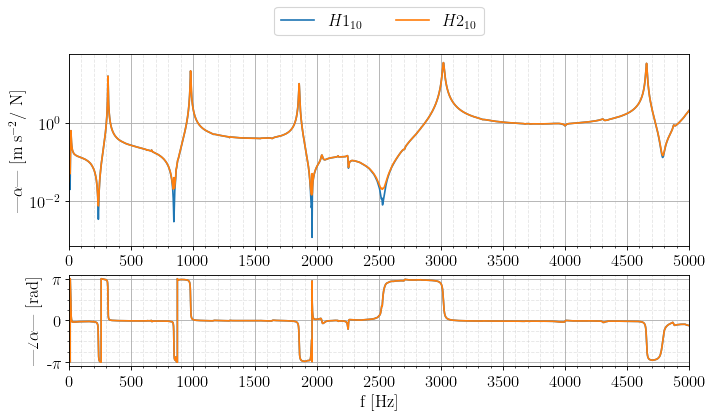

In [59]:
p = 10

plt.figure(figsize=(10,7))
plt.subplot(211)
plt.semilogy(freq, np.abs(H1_acc[:,0,p]), '-')
plt.semilogy(freq, np.abs(H2_acc[:,0,p]), '-')
plt.xlim(0,5000);
plt.ylabel(r'|$\alpha$| [m s$^{-2}$/ N]')
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
x_ticks = np.arange(0, 5001, 500)
plt.xticks(x_ticks)

plt.subplot(413)
plt.plot(freq, np.angle(H1_acc[:,0,p]), '-', label='$H1_{%d}$'%p)
plt.plot(freq, np.angle(H2_acc[:,0,p]), '-', label='$H2_{%d}$'%p)
plt.xlim(0,5000);
plt.ylabel(r'|$\angle \alpha$| [rad]')
plt.yticks((-np.pi,0,np.pi), (r'-$\pi$', r'0', r'$\pi$'));
plt.xlabel('f [Hz]');
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
x_ticks = np.arange(0, 5001, 500)
plt.xticks(x_ticks)

plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 4));
#plt.savefig("slike/cenilke_H1_H2.pdf",bbox_inches = "tight")

#### Primerjava H2 v vseh točkah ###

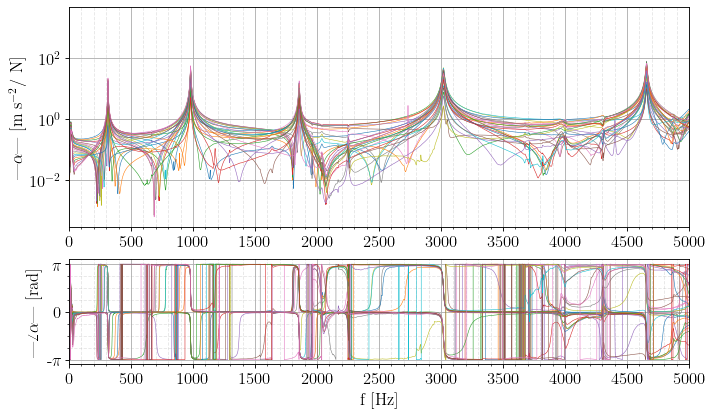

In [60]:
# primerjava cenmilk H2 v vseh točkah
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", 
          "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan",
         "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", 
          "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan",
         "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", 
          "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan",
         "tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", 
          "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

plt.figure(figsize=(10,8))

for p in range(len(meritve)):
    plt.subplot(211)
    plt.semilogy(freq, np.abs(H2_acc[:,0,p]), '-', color=colors[p], linewidth = 0.5)
    plt.xlim(0,5000);
    plt.ylabel(r'|$\alpha$| [m s$^{-2}$/ N]')
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
    x_ticks = np.arange(0, 5001, 500)
    plt.xticks(x_ticks)

    plt.subplot(413)
    plt.plot(freq, np.angle(H2_acc[:,0,p]), '-', label='$H2_{%d}$'%p, color=colors[p], linewidth = 0.5)
    plt.xlim(0,5000);
    plt.ylabel(r'|$\angle \alpha$| [rad]')
    plt.yticks((-np.pi,0,np.pi), (r'-$\pi$', r'0', r'$\pi$'));
    plt.xlabel('f [Hz]');
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
    x_ticks = np.arange(0, 5001, 500)
    plt.xticks(x_ticks)

#plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 4));
#plt.savefig("slike/H2_all.pdf",bbox_inches = "tight")

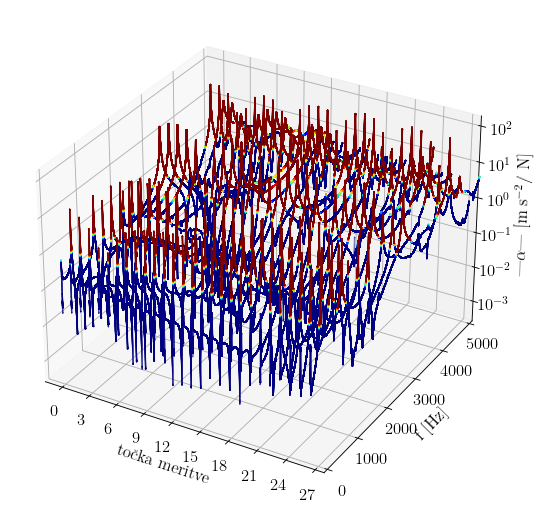

In [61]:
def log_tick_formatter(val, pos=None):
    return f"$10^{{{int(val)}}}$"  # remove int() if you don't use MaxNLocator
    # return f"{10**val:.2e}"      # e-Notation

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(111, projection='3d')

for p in range(len(meritve)):
    x = np.zeros(len(freq[0:9000*zp]), dtype=int) + p
    y = freq[0:9000*zp]
    z = np.log10(np.abs(H2_acc[:,0,p]))[0:9000*zp]
    colorbar_val = -12*(z/max(z)-1/2)**2+4
    line = ax.scatter(x, y, z, s=0.05 , color = plt.cm.jet(colorbar_val))
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.set_ylim(0,5000)
ax.set_xlabel('točka meritve')
ax.set_ylabel(r'f [Hz]')
ax.set_zlabel(r'|$\alpha$| [m s$^{-2}$/ N]')
#plt.savefig("slike/cenilke_H2.pdf",bbox_inches = "tight")
plt.show()

### Koherenca vseh meritev ###

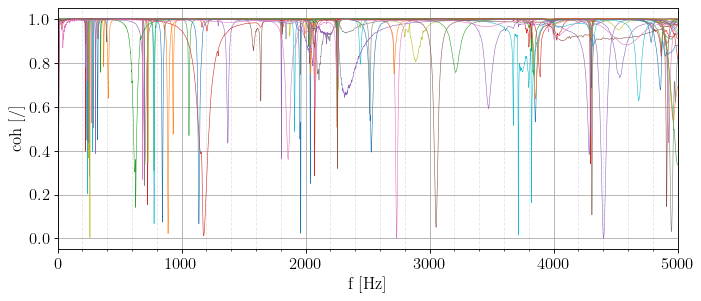

In [62]:
# koherenca
coh = H1_acc/H2_acc
plt.figure(figsize=(10,4))
plt.plot(freq, np.real(coh[:,0,:]), linewidth = 0.5)
plt.xlim(0,5000);
plt.ylabel(r'coh [/]')
plt.xlabel('f [Hz]');
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
#plt.savefig("slike/koherenca.pdf",bbox_inches = "tight")

### Iskanje vrhov

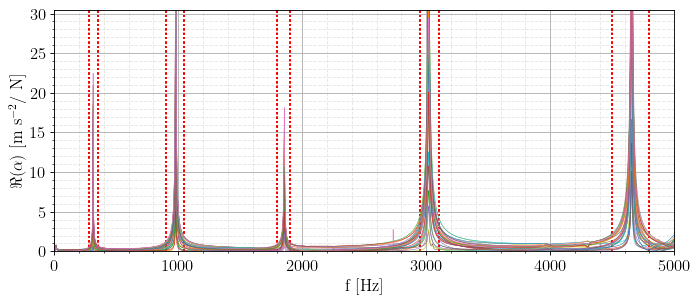

In [91]:
# frekvenčno območje vrhov H2
fr_limit = np.array([[280, 350],[900, 1050],[1800, 1900],[2950, 3100],[4500, 4800]]) # spodnja, zgornja
# Grafično izris območij
plt.figure(figsize=(10,4))
for p in range(len(meritve)):
    plt.plot(freq, np.abs(H2_acc[:,0,p]), linewidth = 0.5)
    plt.vlines(fr_limit.flatten(), 0, np.abs(H2_acc[:,0,p][0:5000]).max()+30, ls=':', color='red', alpha=0.3)
    plt.xlim(0,5000);
    plt.ylim(0, np.abs(H2_acc[:,0,p][0:5000]).max()+30);
    plt.ylabel(r'$\Re$($\alpha$) [m s$^{-2}$/ N]')
    plt.xlabel('f [Hz]');
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid()
    plt.grid(which='minor', linestyle = '--', alpha=0.3)
#plt.savefig("slike/iskanje_vrhov.pdf",bbox_inches = "tight")
plt.show()

### Prehod v receptanco ###

In [92]:
# prehod v receptanco
freq[0] = 1e-12
H2 = np.einsum('ijk,i->ijk', H2_acc, -1/(2*np.pi*freq)**2)

# frekvenčno območje vrhov H2
fr_range = np.zeros((len(fr_limit), 2), dtype=int)
for r in range(len(fr_limit)):
    fr_range_single = np.array((np.abs(freq-fr_limit[r][0]).argmin(), np.abs(freq-fr_limit[r][1]).argmin()))
    fr_range[r] = fr_range_single

## Metoda polovične moči ##
### Izračun ###

In [93]:
fr = np.zeros((len(fr_range), len(meritve)))
damp_r = np.zeros((len(fr_range), len(meritve)))
Ar = np.zeros((len(fr_range), len(meritve)), dtype=complex)

for r in range(len(fr_range)): 
    for p in range(len(meritve)):
        ind = np.argmax(np.abs(H2[slice(*fr_range[r]),0,p]))
        half_power_point = np.abs(H2[ind+fr_range[r][0],0,p])/np.sqrt(2)
        ind_half_a =  np.argmin(np.abs(np.abs(H2[fr_range[r][0]:ind+fr_range[r][0],0,p])-half_power_point))
        ind_half_b = np.argmin(np.abs(np.abs(H2[fr_range[r][0]+ind:fr_range[r][1],0,p])-half_power_point))
        fr[r][p] = freq[ind+fr_range[r][0]] # frekvenca
        damp_r[r][p] = (freq[fr_range[r][0]+ind+ind_half_b]-freq[ind_half_a+fr_range[r][0]])/freq[ind+fr_range[r][0]] # histerezni model dušenja
        Ar[r][p] = H2[ind+fr_range[r][0],0,p]*damp_r[r][p]*(2*np.pi*fr[r][p])**2

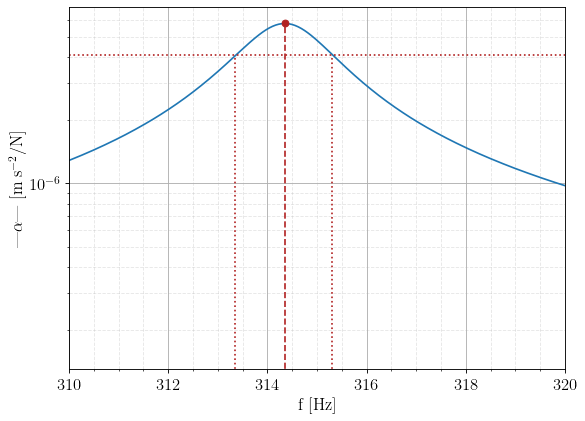

In [94]:
# izris za r in p
r = 0
ind = np.argmax(np.abs(H2[slice(*fr_range[r]),0,p]))
half_power_point = np.abs(H2[ind+fr_range[r][0],0,p])/np.sqrt(2)
ind_half_a =  np.argmin(np.abs(np.abs(H2[fr_range[r][0]:ind+fr_range[r][0],0,p])-half_power_point))
ind_half_b = np.argmin(np.abs(np.abs(H2[fr_range[r][0]+ind:fr_range[r][1],0,p])-half_power_point))
plt.semilogy(freq[slice(*fr_range[r])], np.abs(H2[slice(*fr_range[r]),0,p]));
plt.semilogy(freq[ind+fr_range[r][0]], np.abs(H2[ind+fr_range[r][0],0,p]), 'o', color='firebrick')
plt.axhline(y=half_power_point, color='firebrick', ls=':')
plt.vlines(x=freq[ind+fr_range[r][0]], ymin = 0, ymax=np.abs(H2[ind+fr_range[r][0],0,p]), color='firebrick', ls='--')
plt.vlines(x=freq[ind_half_a+fr_range[r][0]], ymin = 0, ymax=half_power_point, color='firebrick', ls=':')
plt.vlines(x=freq[ind+ind_half_b+fr_range[r][0]], ymin = 0, ymax=half_power_point, color='firebrick', ls=':')
plt.xlabel(r'f [Hz]');
plt.ylabel(r'|$\alpha$| [m s$^{-2}$/N]');
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
plt.xlim(310,320);

### Rezultati ###
#### Lastne frekvence ####

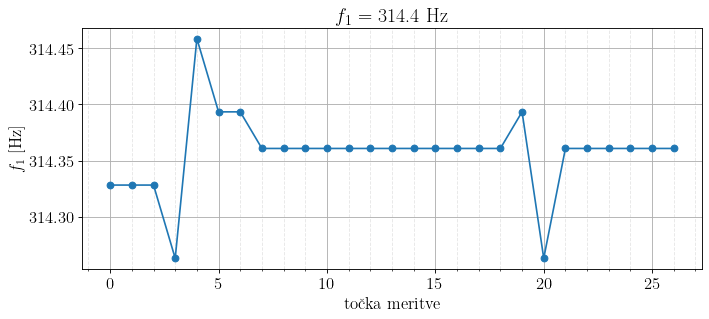

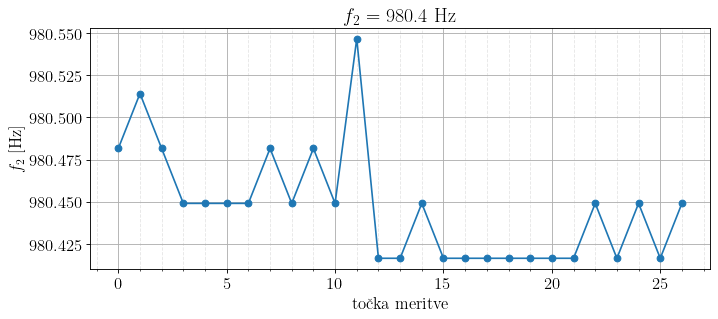

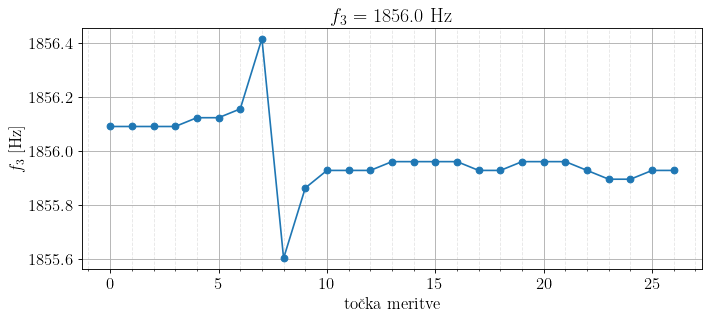

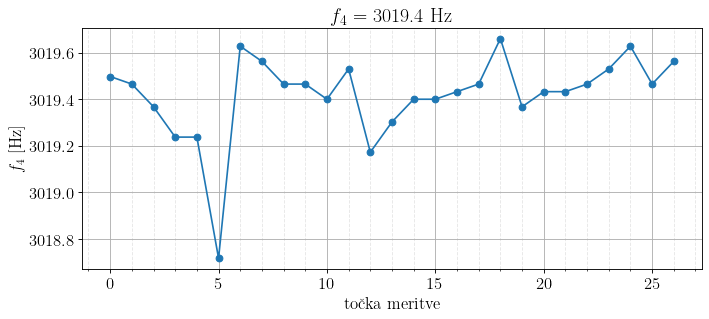

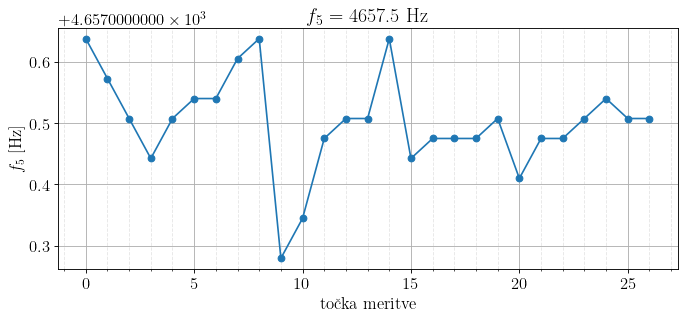

In [95]:
# Lastna frekvenca
fr_mpm = fr
for r in range(len(fr_range)):
    plt.figure(figsize=(10,4))
    plt.plot(fr[r], 'o-');
    plt.ylabel(r'$f_%d$ [Hz]'%(r+1));
    plt.xlabel('točka meritve');
    plt.title(r'$f_%d$'%(r+1) + r' = %.1f Hz'%np.average(fr[r]));
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

#### Dušenje ####

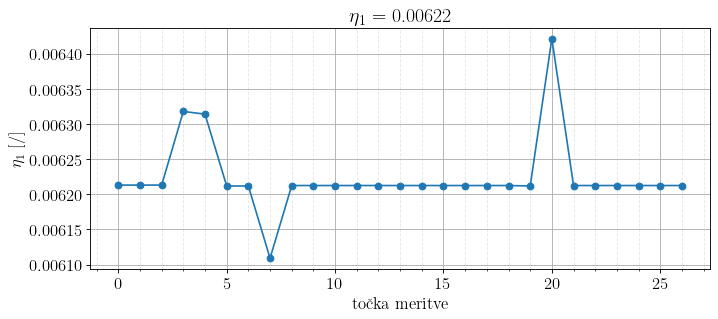

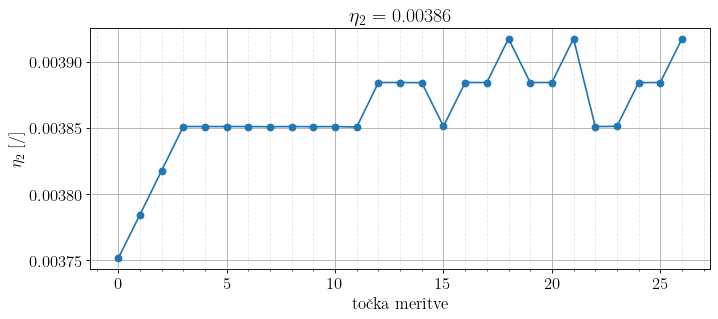

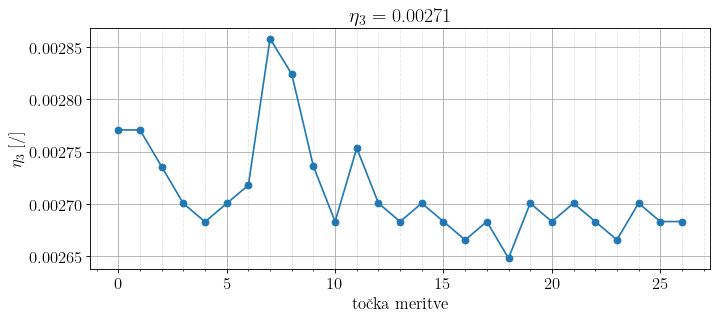

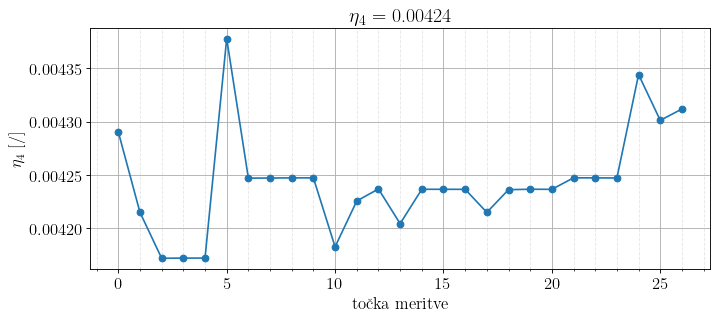

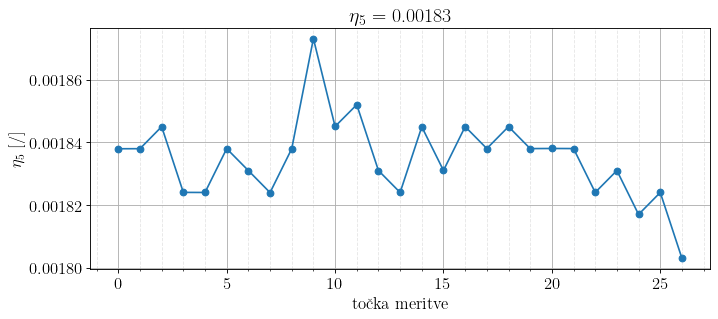

In [96]:
# Dušenje
damp_r_mpm = damp_r
for r in range(len(fr_range)):
    plt.figure(figsize=(10,4))
    plt.plot(damp_r[r], 'o-');
    plt.ylabel(r'$\eta_%d$ [/]'%(r+1));
    plt.xlabel('točka meritve');
    plt.title(r'$\eta_%d$'%(r+1) + r' = %.5f'%np.average(damp_r[r]));
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

#### Lastne oblike ####

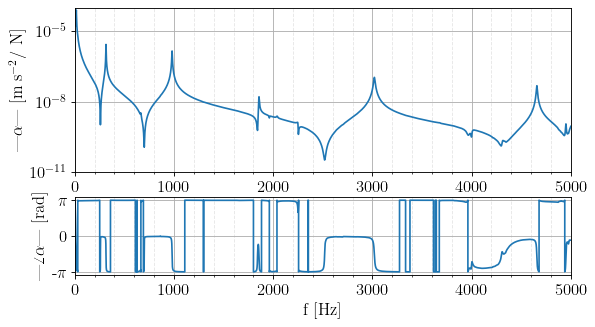

In [97]:
# preverimo pasivnost driving point-a, ki je v točki 7
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.semilogy(freq, np.abs(H2[:,0,7]))
plt.xlim(0,5000);
plt.ylim(10**-11,10**-4)
plt.ylabel(r'|$\alpha$| [m s$^{-2}$/ N]')
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

plt.subplot(413)
plt.plot(freq, np.angle(H2[:,0,7]))
plt.xlim(0,5000);
plt.ylabel(r'|$\angle \alpha$| [rad]')
plt.yticks((-np.pi,0,np.pi), (r'-$\pi$', r'0', r'$\pi$'));
plt.xlabel('f [Hz]');
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

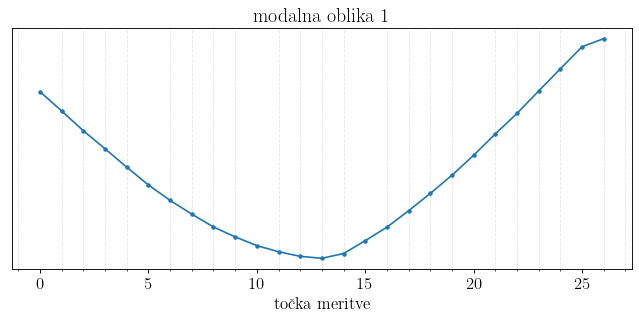

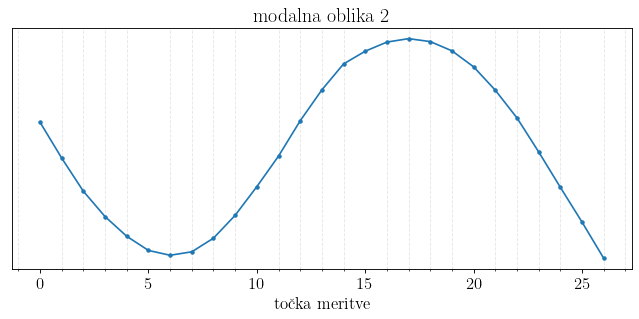

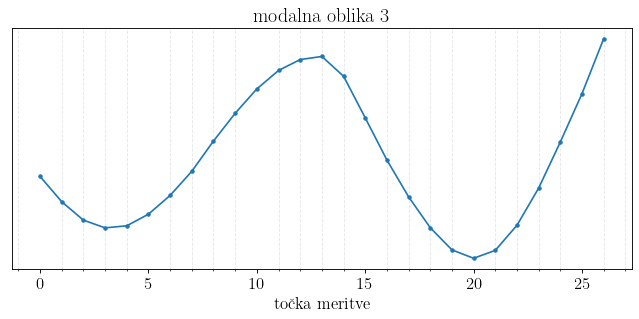

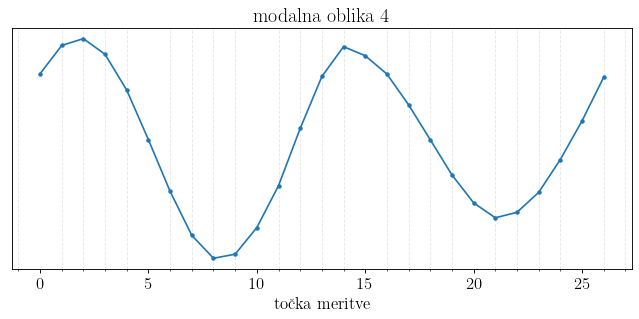

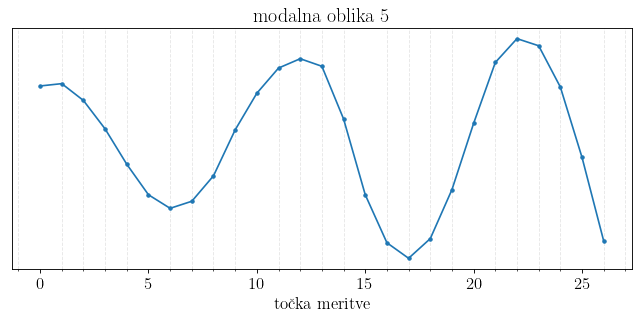

In [98]:
mode_shape_mpm = np.zeros((len(fr_range), len(meritve)))
for r in range(len(fr_range)):
    ϕ7 = np.sqrt(np.abs(Ar[r][7])) # najprej izračunamo φ_7 iz druge vrstice
    mode_shape = np.sign(np.imag(Ar[r]))*(np.abs(Ar[r])/ϕ7)# nato izračunamo vektor φ_j
    mode_shape_mpm[r] = mode_shape
    # Izrišemo modalne oblike
    plt.figure(figsize=(10,4))
    plt.plot(mode_shape, '.-');
    plt.yticks(());
    plt.xlabel('točka meritve');
    plt.title('modalna oblika %d'%(r+1));
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(False)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

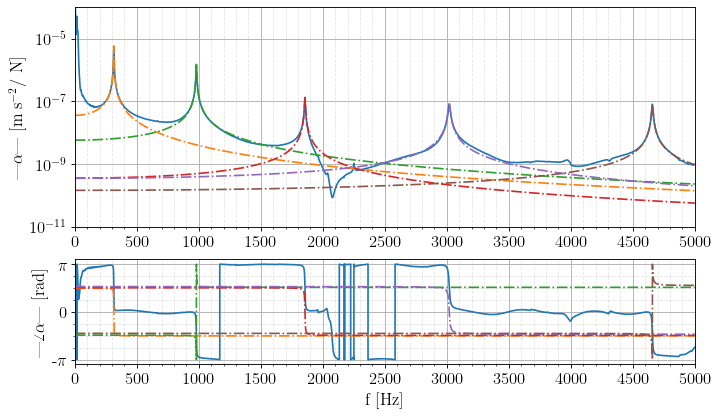

In [99]:
H2_rec_mpm = np.zeros((N//2*zp+1,1,len(meritve)), dtype='complex')
# rekonstrukcija signala
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.semilogy(freq, np.abs(H2[:,0,p]))
plt.subplot(413)
plt.plot(freq, np.angle(H2[:,0,p]))
for r in range(len(fr_range)):
    H2_rec = np.einsum('jk,i->ijk',np.expand_dims(Ar[r], axis=0),\
                1/((2*np.pi*np.average(fr[r]))**2-(2*np.pi*freq)**2+1j*(2*np.pi*np.average(fr[r]))**2*np.average(damp_r[r])))
    H2_rec_mpm += H2_rec 
    plt.subplot(211)
    plt.semilogy(freq, np.abs(H2_rec[:,0,p]), '-.')
    plt.xlim(0,5000);
    plt.ylim(10**-11,10**-4)
    plt.ylabel(r'|$\alpha$| [m s$^{-2}$/ N]')
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
    x_ticks = np.arange(0, 5001, 500)
    plt.xticks(x_ticks)
    
    plt.subplot(413)
    plt.plot(freq, np.angle(H2_rec[:,0,p]), '-.')
    plt.xlim(0,5000);
    plt.ylabel(r'|$\angle \alpha$| [rad]')
    plt.yticks((-np.pi,0,np.pi), (r'-$\pi$', r'0', r'$\pi$'));
    plt.xlabel('f [Hz]');
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
    x_ticks = np.arange(0, 5001, 500)
    plt.xticks(x_ticks)
    
plt.show();

## Metoda prilagajanja kroga ##
### Izračun ###

In [124]:

fr = np.zeros((len(fr_range), len(meritve)))
damp_r = np.zeros((len(fr_range), len(meritve)))
Ar = np.zeros((len(fr_range), len(meritve)), dtype=complex)

fr_ind = np.zeros((len(fr_range), len(meritve)))

for r in range(len(fr_range)): 
    for p in range(len(meritve)):
#for r in range(0,1):
#    for p in range(8,9):
        H2_values = H2[slice(*fr_range[r]),0,p]
        # sistem enačb
        A = np.array([
            [np.sum(np.real(H2_values)**2), np.sum(np.real(H2_values)*np.imag(H2_values)), -np.sum(np.real(H2_values))],
            [np.sum(np.real(H2_values)*np.imag(H2_values)), np.sum(np.imag(H2_values)**2), -np.sum(np.imag(H2_values))],
            [-np.sum(np.real(H2_values)), -np.sum(np.imag(H2_values)), len(H2_values)]
            ])
        B = np.array([-(np.sum(np.real(H2_values)**3) + np.sum(np.real(H2_values)*np.imag(H2_values)**2) ), 
                      -(np.sum(np.imag(H2_values)**3) + np.sum(np.imag(H2_values)*np.real(H2_values)**2) ), 
                      np.sum(np.real(H2_values)**2) + np.sum(np.imag(H2_values)**2)])
        
        a, b, c = np.linalg.solve(A, B) # Reševanje enačbe
        
        # pridobitev faktorjev x0, y0 in R0
        x0 = -a/2 
        y0 = -b/2
        R0 = np.sqrt(c+x0**2+y0**2)
        
        # Izračum f_a, f_b in f_r
        vector = np.column_stack((np.real(H2_values) - x0, np.imag(H2_values) - y0))
        vector_1 = vector[0:-1]
        vector_2 = vector[1:]
        
        unit_vector_1 = vector_1 / np.column_stack((np.linalg.norm(vector_1, axis=1), np.linalg.norm(vector_1, axis=1))) #v_j
        unit_vector_2 = vector_2 / np.column_stack((np.linalg.norm(vector_2, axis=1), np.linalg.norm(vector_2, axis=1))) #v_j+1

        angle = np.array([])
        for k in range(len(unit_vector_1)):
            dot_product = np.dot(unit_vector_1[k], unit_vector_2[k])
            if -1 <= dot_product <= 1:
                angle = np.append(angle, np.arccos(dot_product))
            else:
                angle = np.append(angle, 0.0)

        ind_phi_a, ind_phi_b = angle.argsort()[-2:][::-1]
        if ind_phi_a > ind_phi_b:
            ind_phi_a = ind_phi_a -1 
            ind_phi_b = ind_phi_b + 1
        
        ind_f_a = ind_phi_a
        ind_f_r = ind_phi_b
        ind_f_b = ind_phi_b+1
        
        fr_ind[r][p] = ind_f_r
        
        f_a = freq[slice(*fr_range[r])][ind_f_a]
        f_b = freq[slice(*fr_range[r])][ind_f_b]
        f_r = freq[slice(*fr_range[r])][ind_f_r]
        fr[r][p] = f_r
        
        # izračun dušenja
        delta_phi_a = angle[ind_phi_a]/2 
        delta_phi_b = angle[ind_phi_b]/2 
        damp_r[r][p] = (f_b**2 - f_a**2) / f_r**2 * 1 / ( np.tan(delta_phi_a) + np.tan(delta_phi_b) ) # dušenje
        
        # modalna konstanta
        xd = 2*x0 - np.real(H2_values[ind_f_r]) 
        yd = 2*y0 - np.imag(H2_values[ind_f_r])
        Ar[r][p] = 2 * f_r**2 * damp_r[r][p] * R0 * cmath.exp((np.arctan2(x0-xd , y0-yd)*1j))
        #Ar[r][p] = 2 * f_r**2 * damp_r[r][p] * R0 * cmath.exp((np.arctan((x0-xd)/(y0-yd))*1j))

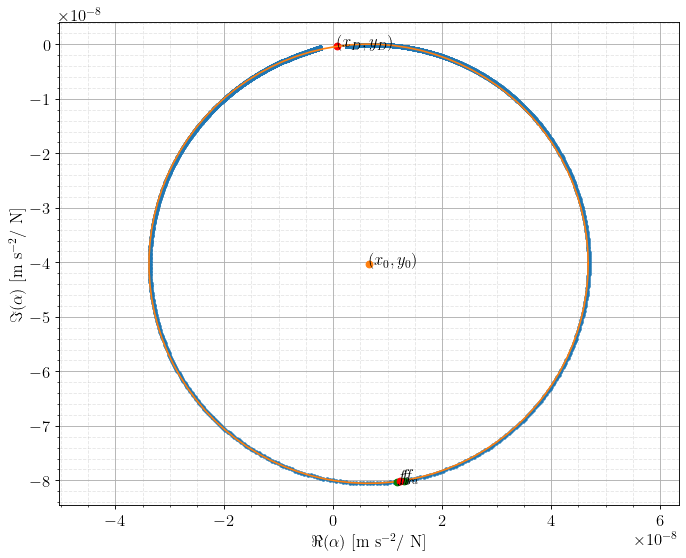

In [125]:
# nyquistov izris
plt.figure(figsize=(10,8))
plt.plot(np.real(H2_values), np.imag(H2_values), '.')
plt.plot(x0, y0, 'o')
plt.annotate(r'$(x_0, y_0)$', (x0,y0))
plt.plot(xd, yd, 'ro')
plt.annotate(r'$(x_D, y_D)$', (xd,yd))
plt.plot(R0*np.cos(np.linspace(0, 2*np.pi, 100))+x0, R0*np.sin(np.linspace(0, 2*np.pi, 100))+y0, '-', color="tab:orange")
plt.plot(np.real(H2_values[ind_f_a]), np.imag(H2_values[ind_f_a]), 'go')
plt.annotate(r'$f_a$', (np.real(H2_values[ind_f_a]), np.imag(H2_values[ind_f_a])))
plt.plot(np.real(H2_values[ind_f_b]), np.imag(H2_values[ind_f_b]), 'go')
plt.annotate(r'$f_b$', (np.real(H2_values[ind_f_b]), np.imag(H2_values[ind_f_b])))
plt.plot(np.real(H2_values[ind_f_r]), np.imag(H2_values[ind_f_r]), 'ro')
plt.annotate(r'$f_r$', (np.real(H2_values[ind_f_r]), np.imag(H2_values[ind_f_r])))
plt.xlabel(r'$\Re$($\alpha$) [m s$^{-2}$/ N]')
plt.ylabel(r'$\Im$($\alpha$) [m s$^{-2}$/ N]');
plt.axis('equal');
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.grid()
plt.grid(which='minor', linestyle = '--', alpha=0.3)

### Rezultati ###
#### Lastne frekvence ####

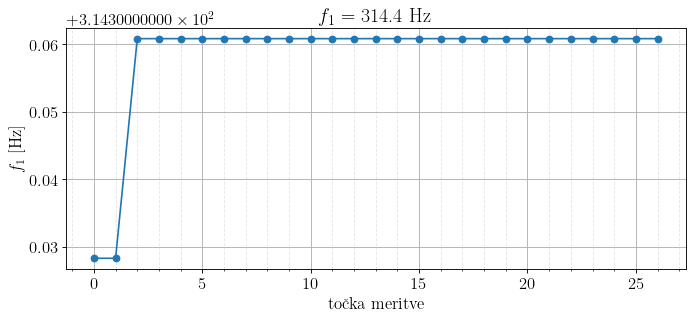

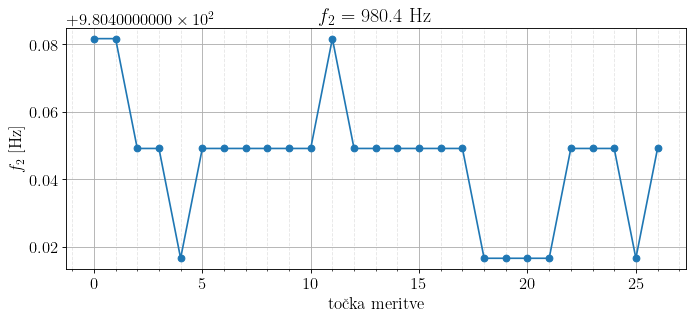

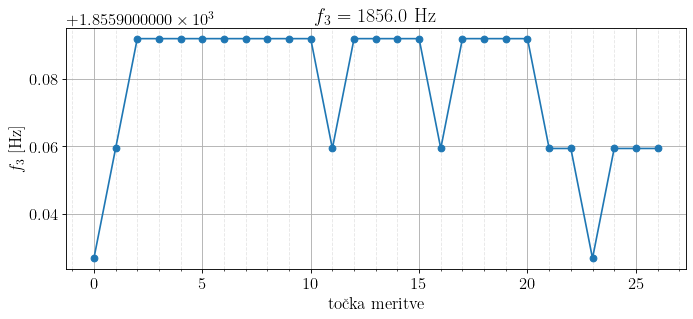

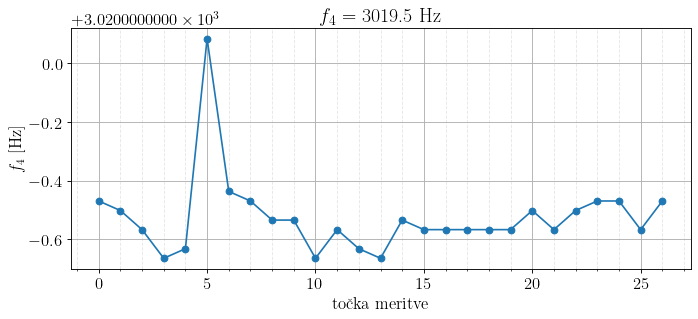

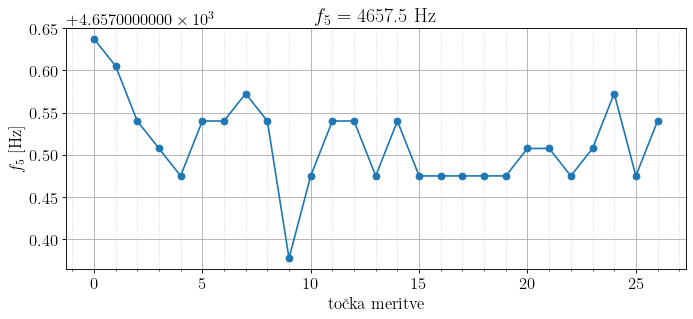

In [126]:
# Lastna frekvenca
fr_mpk = fr
for r in range(len(fr_range)):
    plt.figure(figsize=(10,4))
    plt.plot(fr[r], 'o-');
    plt.ylabel(r'$f_%d$ [Hz]'%(r+1));
    plt.xlabel('točka meritve');
    plt.title(r'$f_%d$'%(r+1) + r' = %.1f Hz'%np.average(fr[r]));
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

#### Dušenje ####

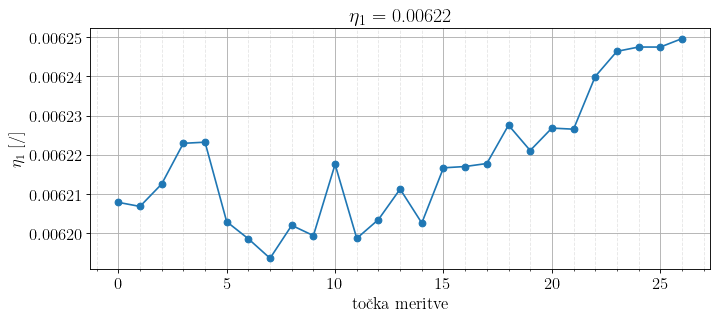

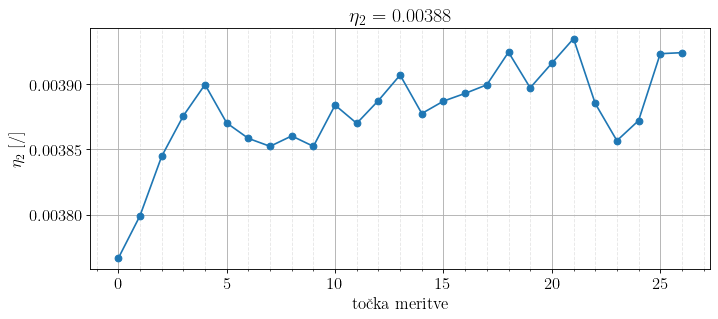

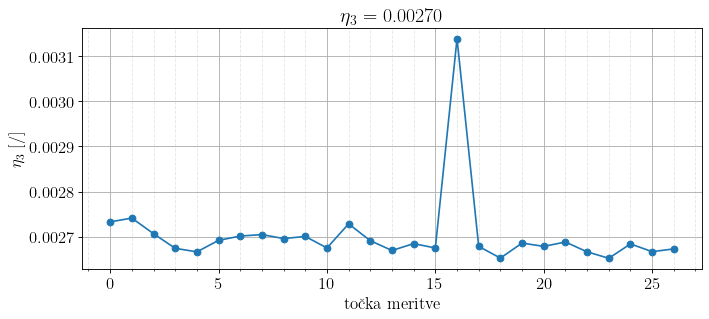

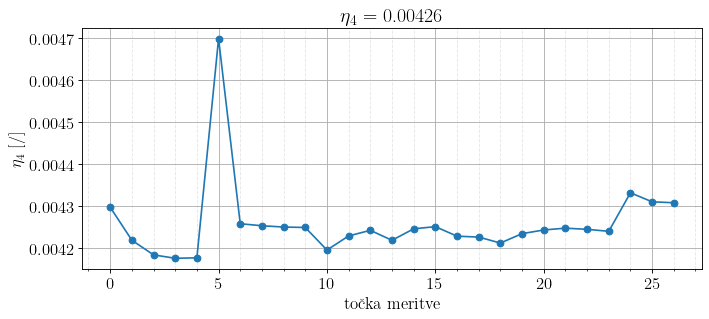

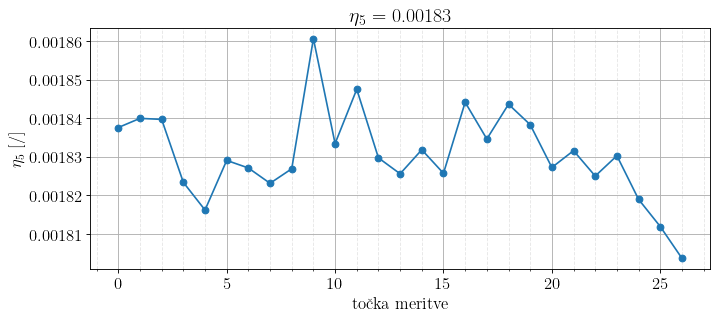

In [127]:
# Dušenje
damp_r_mpk = damp_r
for r in range(len(fr_range)):
    plt.figure(figsize=(10,4))
    plt.plot(damp_r[r], 'o-');
    plt.ylabel(r'$\eta_%d$ [/]'%(r+1));
    plt.xlabel('točka meritve');
    plt.title(r'$\eta_%d$'%(r+1) + r' = %.5f'%np.average(damp_r[r]));
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

#### Lastne oblike ####

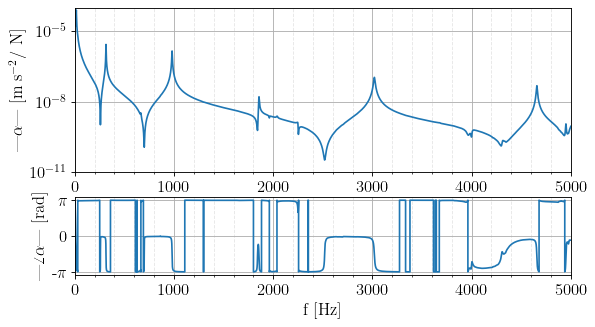

In [128]:
# preverimo pasivnost driving point-a, ki je v točki 7
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.semilogy(freq, np.abs(H2[:,0,7]))
plt.xlim(0,5000);
plt.ylim(10**-11,10**-4)
plt.ylabel(r'|$\alpha$| [m s$^{-2}$/ N]')
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

plt.subplot(413)
plt.plot(freq, np.angle(H2[:,0,7]))
plt.xlim(0,5000);
plt.ylabel(r'|$\angle \alpha$| [rad]')
plt.yticks((-np.pi,0,np.pi), (r'-$\pi$', r'0', r'$\pi$'));
plt.xlabel('f [Hz]');
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

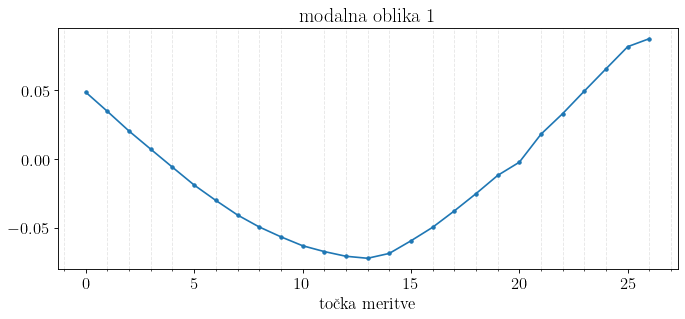

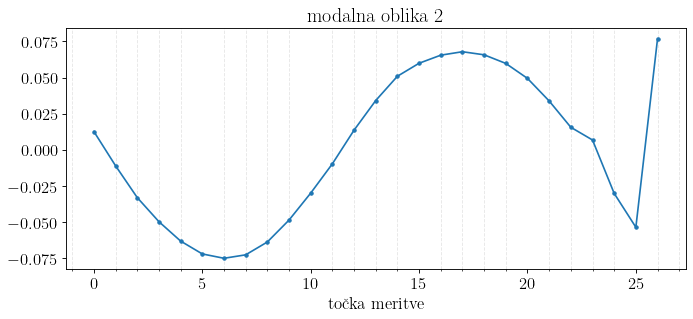

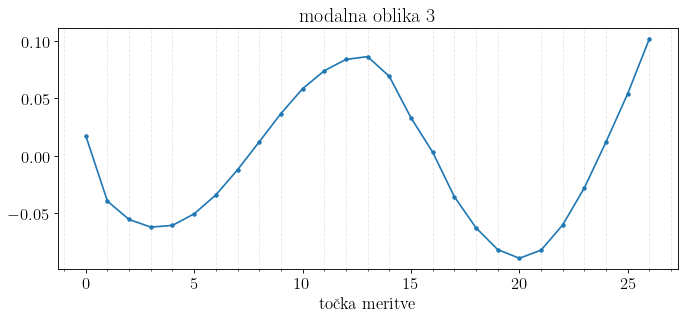

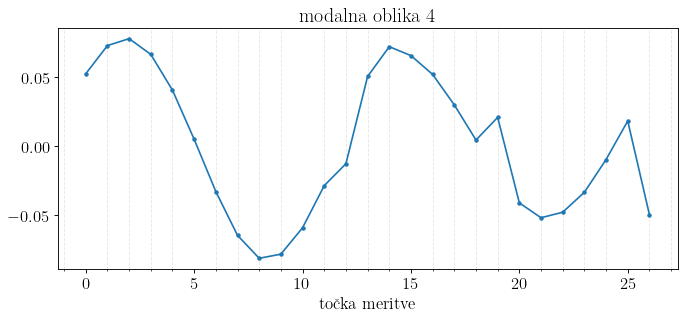

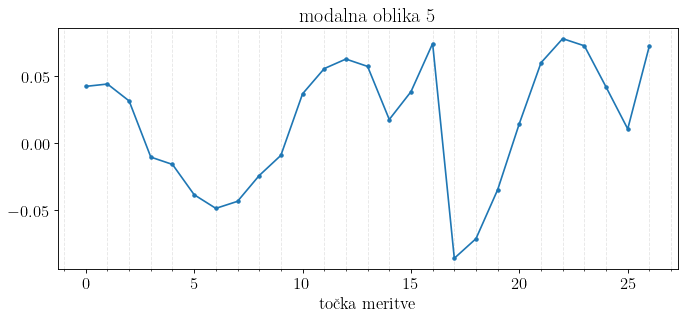

In [129]:
mode_shape_mpk = np.zeros((len(fr_range), len(meritve)))
for r in range(len(fr_range)):
    ϕ7 = np.sqrt(np.abs(Ar[r][7])) # najprej izračunamo φ_7 iz druge vrstice
    mode_shape = np.sign(np.imag(Ar[r]))*(np.abs(Ar[r])/ϕ7)# nato izračunamo vektor φ_j
    mode_shape_mpk[r] = mode_shape
    # Izrišemo modalne oblike
    plt.figure(figsize=(10,4))
    plt.plot(mode_shape, '.-');
    #plt.yticks(());
    plt.xlabel('točka meritve');
    plt.title('modalna oblika %d'%(r+1));
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(False)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

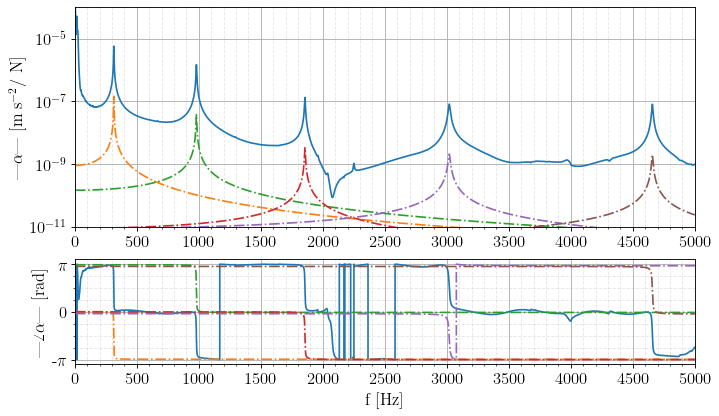

In [130]:
H2_rec_mpk = np.zeros((N//2*zp+1,1,len(meritve)), dtype='complex')
# rekonstrukcija signala
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.semilogy(freq, np.abs(H2[:,0,p]))
plt.subplot(413)
plt.plot(freq, np.angle(H2[:,0,p]))
for r in range(len(fr_range)):
    H2_rec = np.einsum('jk,i->ijk',np.expand_dims(Ar[r], axis=0),\
                1/((2*np.pi*np.average(fr[r]))**2-(2*np.pi*freq)**2+1j*(2*np.pi*np.average(fr[r]))**2*np.average(damp_r[r])))
    H2_rec_mpk += H2_rec
    plt.subplot(211)
    plt.semilogy(freq, np.abs(H2_rec[:,0,p]), '-.')
    plt.xlim(0,5000);
    plt.ylim(10**-11,10**-4)
    plt.ylabel(r'|$\alpha$| [m s$^{-2}$/ N]')
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
    x_ticks = np.arange(0, 5001, 500)
    plt.xticks(x_ticks)
    
    plt.subplot(413)
    plt.plot(freq, np.angle(H2_rec[:,0,p]), '-.')
    plt.xlim(0,5000);
    plt.ylabel(r'|$\angle \alpha$| [rad]')
    plt.yticks((-np.pi,0,np.pi), (r'-$\pi$', r'0', r'$\pi$'));
    plt.xlabel('f [Hz]');
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
    x_ticks = np.arange(0, 5001, 500)
    plt.xticks(x_ticks)
    # nižji vrhovi zaradi ostanka R_jk(omega)

## Elwin-Glessonova metoda ##
### Izračun ###

In [197]:
fr = np.zeros((len(fr_range), len(meritve)))
fr_avg = np.array([])
real_H2_konst = np.zeros((len(fr_range), len(meritve)))
imag_H2_konst = np.zeros((len(fr_range), len(meritve)))
damp_r = np.zeros((len(fr_range), len(meritve)))
Ar = np.zeros((len(fr_range), len(meritve)), dtype=complex)

konst = 1.001

# Iskanje lastnih frekvenc
for r in range(len(fr_range)): 
    for p in range(len(meritve)):
        ind = np.argmax(np.abs(H2[slice(*fr_range[r]),0,p]))
        fr[r][p] = freq[ind+fr_range[r][0]] # lastna frekvenca
        real_H2_konst[r][p] = np.real(H2[int(konst*(ind+fr_range[r][0])),0,p]) # za konstanto zamakjen H2 v frekvenci
        imag_H2_konst[r][p] = np.imag(H2[int(konst*(ind+fr_range[r][0])),0,p])
    fr_avg = np.append(fr_avg, np.average(fr[r]))

D = np.zeros((len(fr_range), len(fr_range)))
for i in range(len(fr_range)):
    for j in range(len(fr_range)):
        D[i,j] = 1/(fr_avg[j]**2 - konst*fr_avg[i]**2)
    
for p in range(len(meritve)):
    Ar[:,p] = np.linalg.solve(D, real_H2_konst[:,p]) + np.linalg.solve(D, imag_H2_konst[:,p]) *1j

for r in range(len(fr_range)): 
    for p in range(len(meritve)):
        ind = np.argmax(np.abs(H2[slice(*fr_range[r]),0,p]))
        damp_r[r][p] = np.abs(Ar[r][p]) / ( fr[r][p]**2 *  np.abs(H2[ind+fr_range[r][0],0,p]) )

### Rezultati ###
#### Lastne frekvence ####

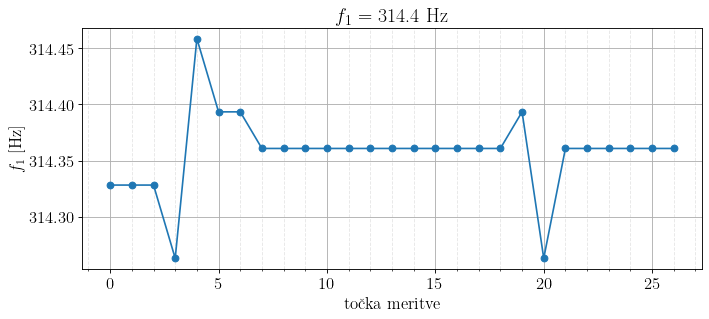

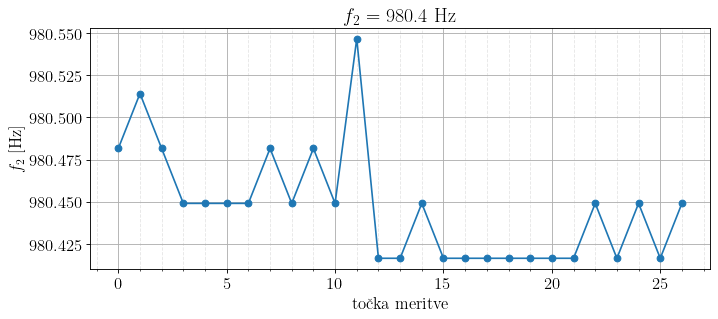

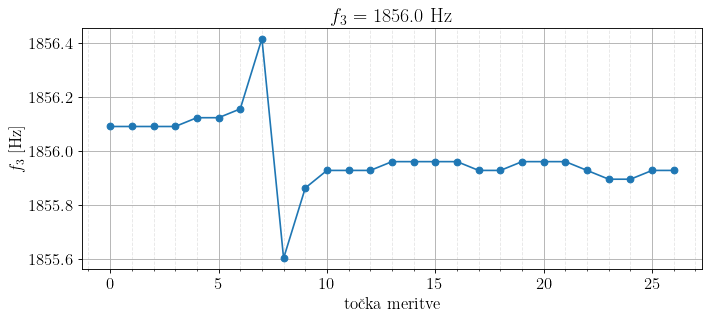

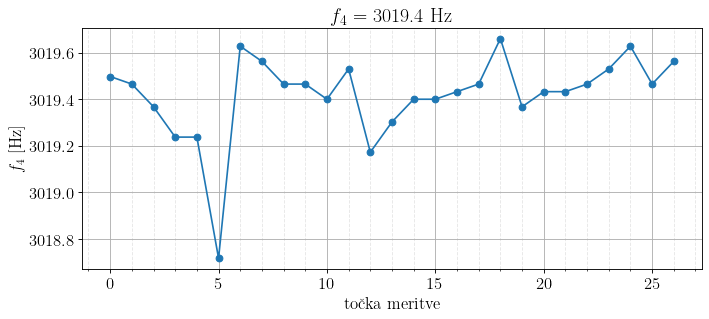

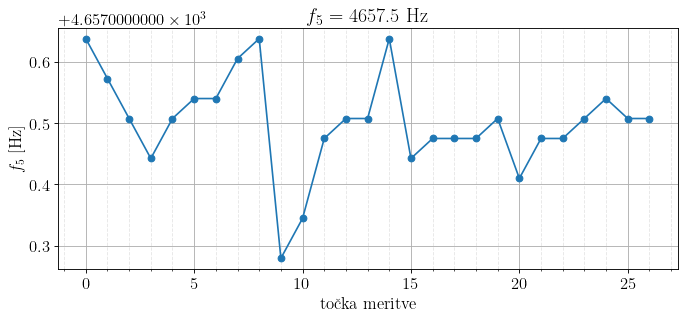

In [198]:
# Lastna frekvenca
fr_egm = fr
for r in range(len(fr_range)):
    plt.figure(figsize=(10,4))
    plt.plot(fr[r], 'o-');
    plt.ylabel(r'$f_%d$ [Hz]'%(r+1));
    plt.xlabel('točka meritve');
    plt.title(r'$f_%d$'%(r+1) + r' = %.1f Hz'%np.average(fr[r]));
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

#### Dušenje ####

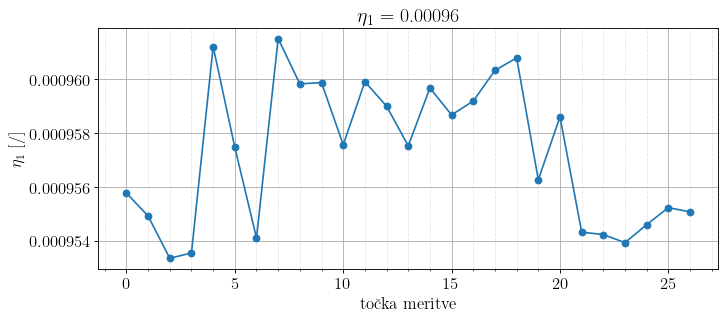

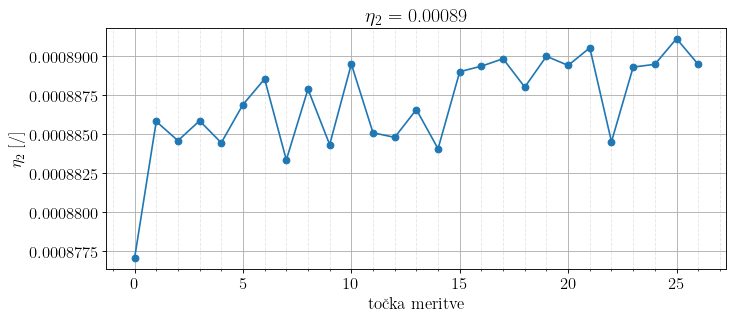

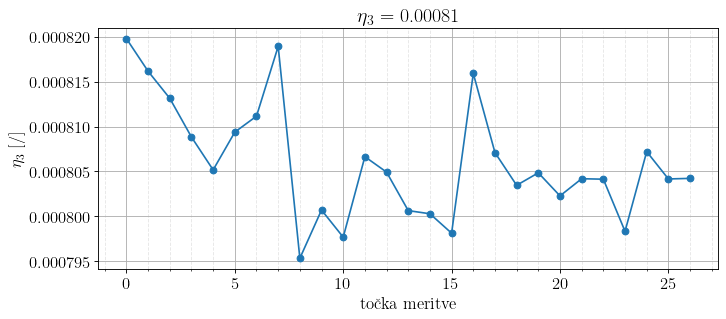

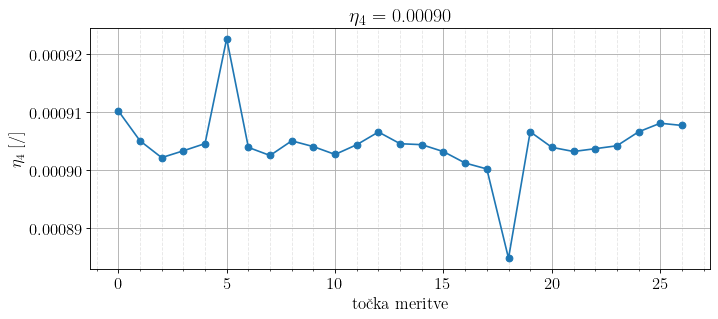

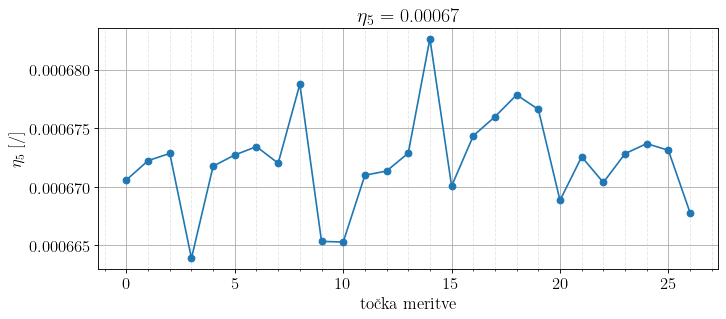

In [199]:
# Dušenje
damp_r_egm = damp_r
for r in range(len(fr_range)):
    plt.figure(figsize=(10,4))
    plt.plot(damp_r[r], 'o-');
    plt.ylabel(r'$\eta_%d$ [/]'%(r+1));
    plt.xlabel('točka meritve');
    plt.title(r'$\eta_%d$'%(r+1) + r' = %.5f'%np.average(damp_r[r]));
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

#### Lastne oblike ####

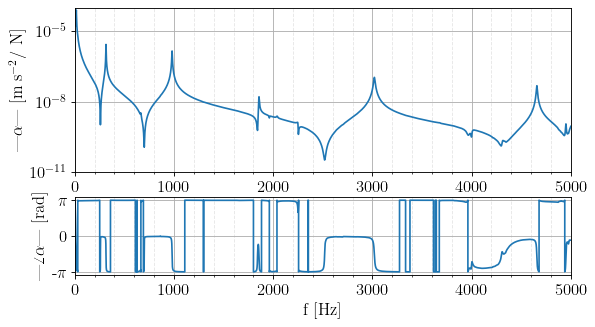

In [200]:
# preverimo pasivnost driving point-a, ki je v točki 7
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.semilogy(freq, np.abs(H2[:,0,7]))
plt.xlim(0,5000);
plt.ylim(10**-11,10**-4)
plt.ylabel(r'|$\alpha$| [m s$^{-2}$/ N]')
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

plt.subplot(413)
plt.plot(freq, np.angle(H2[:,0,7]))
plt.xlim(0,5000);
plt.ylabel(r'|$\angle \alpha$| [rad]')
plt.yticks((-np.pi,0,np.pi), (r'-$\pi$', r'0', r'$\pi$'));
plt.xlabel('f [Hz]');
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

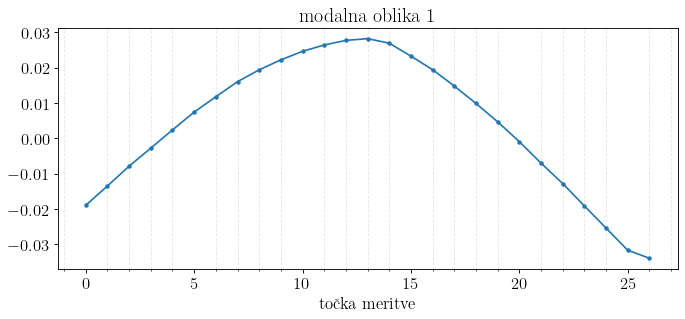

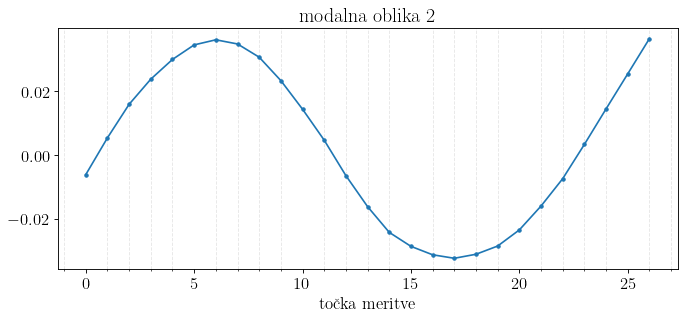

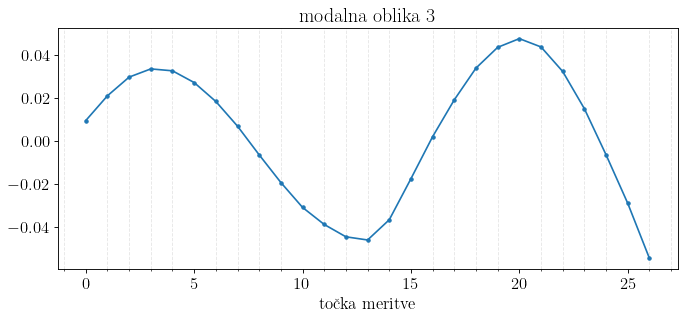

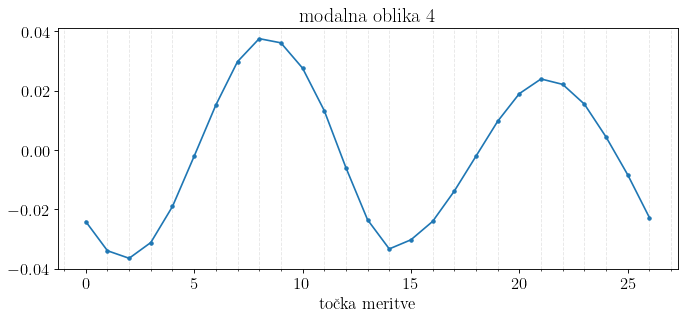

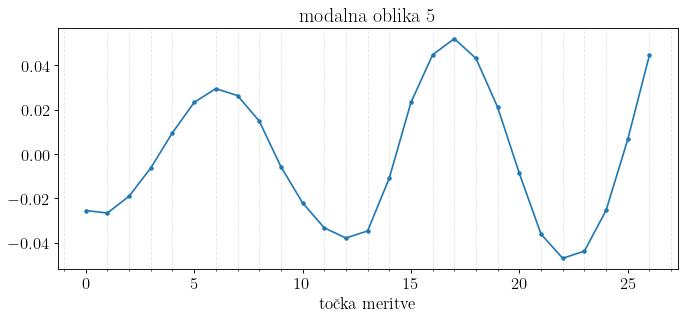

In [201]:
mode_shape_egm = np.zeros((len(fr_range), len(meritve)))
for r in range(len(fr_range)):
    ϕ7 = np.sqrt(np.abs(Ar[r][7])) # najprej izračunamo φ_7 iz druge vrstice
    mode_shape = np.sign(np.imag(Ar[r]))*(np.abs(Ar[r])/ϕ7)# nato izračunamo vektor φ_j
    mode_shape_egm[r] = mode_shape
    # Izrišemo modalne oblike
    plt.figure(figsize=(10,4))
    plt.plot(mode_shape, '.-');
    #plt.yticks(());
    plt.xlabel('točka meritve');
    plt.title('modalna oblika %d'%(r+1));
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(False)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)

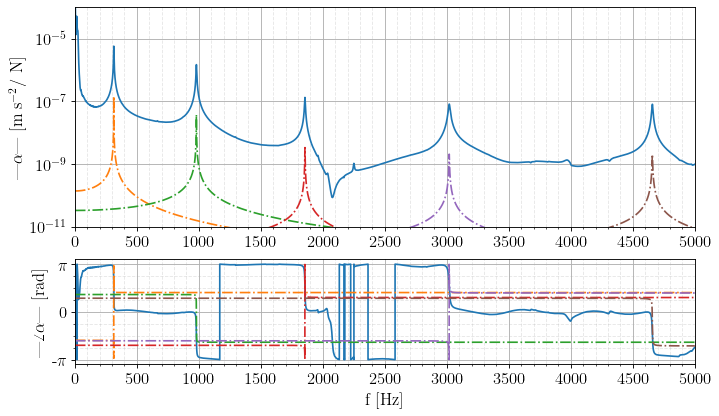

In [202]:
H2_rec_egm = np.zeros((N//2*zp+1,1,len(meritve)), dtype='complex')
# rekonstrukcija signala
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.semilogy(freq, np.abs(H2[:,0,p]))
plt.subplot(413)
plt.plot(freq, np.angle(H2[:,0,p]))
for r in range(len(fr_range)):
    H2_rec = np.einsum('jk,i->ijk',np.expand_dims(Ar[r], axis=0),\
                1/((2*np.pi*np.average(fr[r]))**2-(2*np.pi*freq)**2+1j*(2*np.pi*np.average(fr[r]))**2*np.average(damp_r[r])))
    H2_rec_egm += H2_rec
    plt.subplot(211)
    plt.semilogy(freq, np.abs(H2_rec[:,0,p]), '-.')
    plt.xlim(0,5000);
    plt.ylim(10**-11,10**-4)
    plt.ylabel(r'|$\alpha$| [m s$^{-2}$/ N]')
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
    x_ticks = np.arange(0, 5001, 500)
    plt.xticks(x_ticks)
    
    plt.subplot(413)
    plt.plot(freq, np.angle(H2_rec[:,0,p]), '-.')
    plt.xlim(0,5000);
    plt.ylabel(r'|$\angle \alpha$| [rad]')
    plt.yticks((-np.pi,0,np.pi), (r'-$\pi$', r'0', r'$\pi$'));
    plt.xlabel('f [Hz]');
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(True)
    plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
    x_ticks = np.arange(0, 5001, 500)
    plt.xticks(x_ticks)
    # nižji vrhovi zaradi ostanka R_jk(omega)

## Skupni rezultati ##

### Lastne frekvence ###

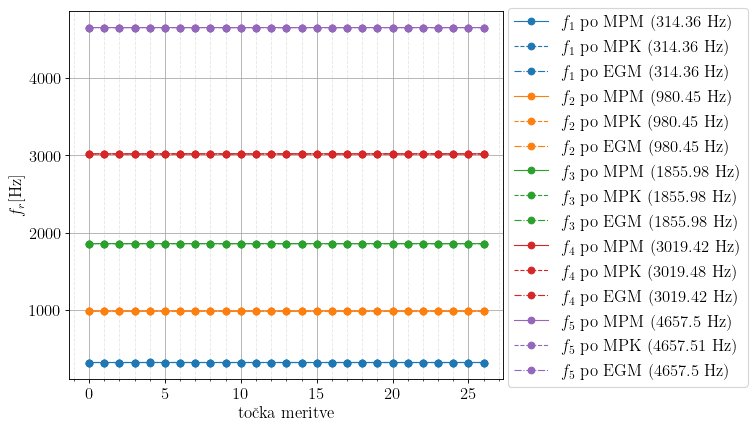

In [203]:
plt.figure(figsize=(7,6.1))
for r in range(len(fr_range)):    
    plt.plot(fr_mpm[r],"o-",color = colors[r],\
             label = f"$f_{r+1}$ po MPM ({np.round(np.mean(fr_mpm[r]),2)} Hz)", lw = 1)
    plt.plot(fr_mpk[r],"o--",color = colors[r],\
             label = f"$f_{r+1}$ po MPK ({np.round(np.mean(fr_mpk[r]),2)} Hz)", lw = 1)
    plt.plot(fr_egm[r],"o-.",color = colors[r],\
             label = f"$f_{r+1}$ po EGM ({np.round(np.mean(fr_egm[r]),2)} Hz)", lw = 1)
    
    plt.ylabel(r'$f_r$[Hz]');
    plt.xlabel('točka meritve');
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)    
plt.legend(loc = (1.01,-0.02));
#plt.savefig("slike/rezultati/frekvence.pdf",bbox_inches = "tight")

### Dušenje ###

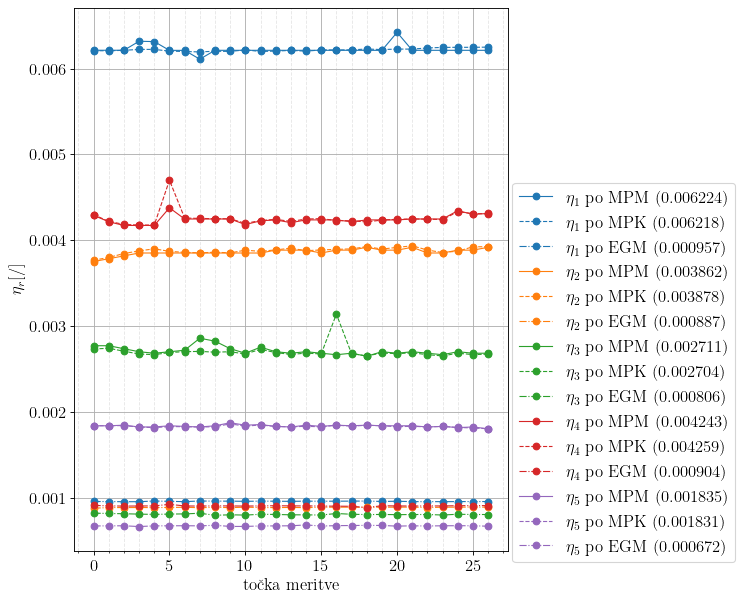

In [208]:
plt.figure(figsize=(7,9))
for r in range(len(fr_range)):    
    plt.plot(damp_r_mpm[r],"o-",color = colors[r],\
             label = f"$\eta_{r+1}$ po MPM ({np.round(np.mean(damp_r_mpm[r]),6)})", lw = 1)
    plt.plot(damp_r_mpk[r],"o--",color = colors[r],\
             label = f"$\eta_{r+1}$ po MPK ({np.round(np.mean(damp_r_mpk[r]),6)})", lw = 1)
    plt.plot(damp_r_egm[r],"o-.",color = colors[r],\
             label = f"$\eta_{r+1}$ po EGM ({np.round(np.mean(damp_r_egm[r]),6)})", lw = 1)
    
    plt.ylabel(r'$\eta_r$[/]');
    plt.xlabel('točka meritve');
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)    
plt.legend(loc = (1.01,-0.02));
#plt.savefig("slike/rezultati/dušenje.pdf",bbox_inches = "tight")

### Modalne Oblike ###

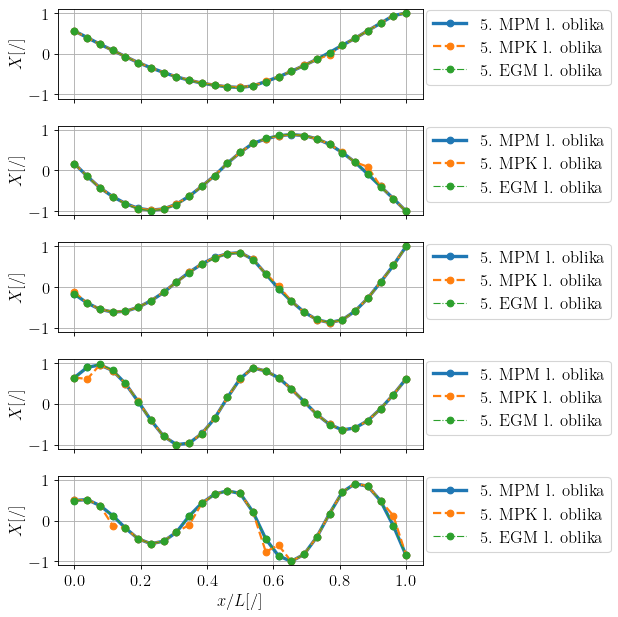

In [196]:
fig, axs = plt.subplots(mode_shape_mpm.shape[0], 1, figsize = (8,8), sharex=True)
x = np.linspace(0,1,mode_shape_mpm.shape[1])
titles = ("(a)","(b)","(c)","(d)","(e)")
lines = ("o-", "o--", "o-.", "o:", "d-")
for r in range(mode_shape_mpm.shape[0]):
    axs[r].plot(x, mode_shape_mpm[r]/np.max(np.abs(mode_shape_mpm[r])), 'o-', color = colors[0], linewidth='3', label = f"{i+1}. MPM l. oblika")
    axs[r].plot(x, mode_shape_mpk[r]/np.max(np.abs(mode_shape_mpk[r])), 'o--', color = colors[1], linewidth='2', label = f"{i+1}. MPK l. oblika")    
    axs[r].plot(x, - mode_shape_egm[r]/np.max(np.abs(mode_shape_egm[r])), 'o-.', color = colors[2], linewidth='1', label = f"{i+1}. EGM l. oblika")
    axs[r].grid()
    axs[r].set_ylim((-1.1,1.1))
    axs[r].set_ylabel("$X$[/]")
    axs[r].legend(loc = (1.01,0.15))
axs[-1].set_xlabel("$x/L$[/]")
fig.tight_layout()
#plt.savefig("slike/rezultati/modalne_oblike.pdf",bbox_inches = "tight")
plt.show()

### Rekonstrukcija signala ###

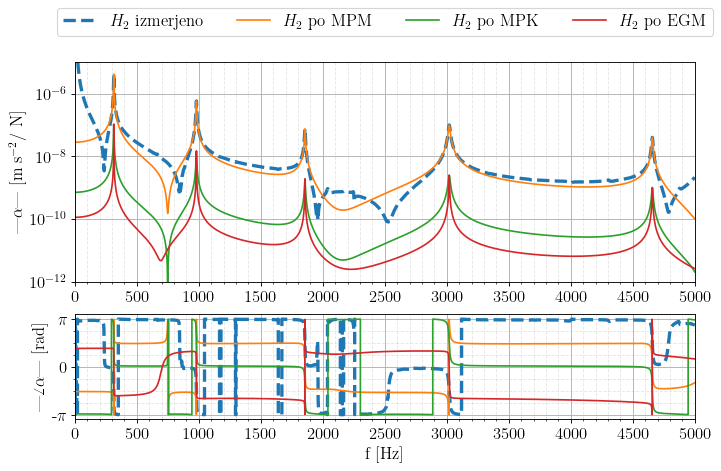

In [212]:
#H2_rec_egm 
plt.figure(figsize=(10,8))

p = 10

plt.subplot(211)
plt.semilogy(freq, np.abs(H2[:,0,p]), '--', linewidth = 3)
plt.semilogy(freq, np.abs(H2_rec_mpm[:,0,p]), '-')
plt.semilogy(freq, np.abs(H2_rec_mpk[:,0,p]), '-')
plt.semilogy(freq, np.abs(H2_rec_egm[:,0,p]), '-')
plt.xlim(0,5000);
plt.ylim(10**(-12), 10**(-5));
plt.ylabel(r'|$\alpha$| [m s$^{-2}$/ N]')
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
x_ticks = np.arange(0, 5001, 500)
plt.xticks(x_ticks)

plt.subplot(413)
plt.plot(freq, np.angle(H2[:,0,p]), '--', linewidth = 3, label='$H_2$ izmerjeno')
plt.plot(freq, np.angle(H2_rec_mpm[:,0,p]), '-', label='$H_2$ po MPM')
plt.plot(freq, np.angle(H2_rec_mpk[:,0,p]), '-', label='$H_2$ po MPK')
plt.plot(freq, np.angle(H2_rec_egm[:,0,p]), '-', label='$H_2$ po EGM')
plt.xlim(0,5000);
plt.ylabel(r'|$\angle \alpha$| [rad]')
plt.yticks((-np.pi,0,np.pi), (r'-$\pi$', r'0', r'$\pi$'));
plt.xlabel('f [Hz]');
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(True)
plt.grid(True, which='minor', linestyle = '--', alpha=0.3)
x_ticks = np.arange(0, 5001, 500)
plt.xticks(x_ticks)

plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 4));
#plt.savefig("slike/rezultati/rekonstrukcija.pdf",bbox_inches = "tight")

### MAC kriterij ###

In [152]:
H = np.zeros((len(meritve), N//2*zp+1), dtype='complex')
for p in range(len(meritve)):
    H[p] = H2_acc[:,0,p].flatten()
    
acc = pyEMA.Model(H, freq, lower=50, upper=5000, pol_order_high=60)

In [153]:
acc.get_poles()

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 251.90it/s]


In [154]:
acc.select_poles()

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 188.56it/s]


<Figure size 640x480 with 0 Axes>

In [155]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  314.4	0.0031
2)  980.4	0.0020
3) 1855.9	0.0013
4) 3019.4	0.0021
5) 4658.1	0.0011


In [156]:
EMA_modes = acc.normal_mode()

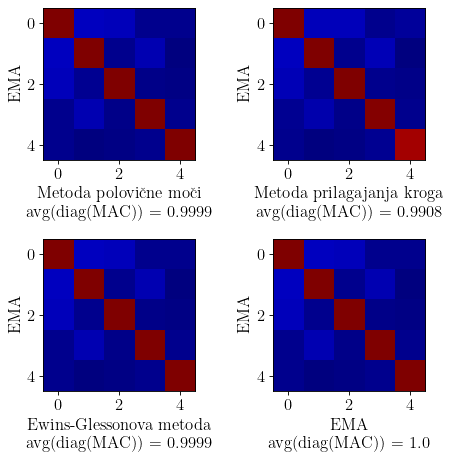

In [211]:
fig, axs = plt.subplots(2, 2, figsize = (6,6))

MAC = pyEMA.MAC(EMA_modes, mode_shape_mpm.T)
axs[0,0].imshow(MAC, vmax = 1, vmin = 0, cmap = cm.jet);
axs[0,0].set_ylabel("EMA")
axs[0,0].set_xlabel(f"Metoda polovične moči\n avg(diag(MAC)) = {np.round(np.mean(MAC.diagonal()),4)}")

MAC = pyEMA.MAC(EMA_modes, mode_shape_mpk.T)
axs[0,1].imshow(MAC, vmax = 1, vmin = 0, cmap = cm.jet);
axs[0,1].set_ylabel("EMA")
axs[0,1].set_xlabel(f"Metoda prilagajanja kroga\n avg(diag(MAC)) = {np.round(np.mean(MAC.diagonal()),4)}")

MAC = pyEMA.MAC(EMA_modes, mode_shape_egm.T)
axs[1,0].imshow(MAC, vmax = 1, vmin = 0, cmap = cm.jet);
axs[1,0].set_ylabel("EMA")
axs[1,0].set_xlabel(f"Ewins-Glessonova metoda\n avg(diag(MAC)) = {np.round(np.mean(MAC.diagonal()),4)}")

MAC = pyEMA.MAC(EMA_modes, EMA_modes)
axs[1,1].imshow(MAC, vmax = 1, vmin = 0, cmap = cm.jet);
axs[1,1].set_ylabel("EMA")
axs[1,1].set_xlabel(f"EMA\n avg(diag(MAC)) = {np.round(np.mean(MAC.diagonal()),4)}")
fig.tight_layout()

#plt.savefig("slike/rezultati/MAC.pdf",bbox_inches = "tight")